In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [3]:
import matplotlib.pyplot as plt

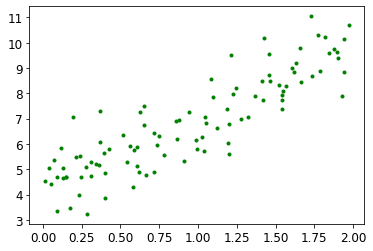

In [4]:
plt.plot(X ,y ,'g.')

In [5]:
X_b = np.c_[np.ones((100 ,1)) ,X] #adds x0 (which is = 1) to all Xn
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [82]:
X_b

array([[1.        , 0.39241197],
       [1.        , 0.11852949],
       [1.        , 1.66599457],
       [1.        , 0.98750982],
       [1.        , 0.04408691],
       [1.        , 0.89715209],
       [1.        , 0.42112993],
       [1.        , 1.72680085],
       [1.        , 1.01950337],
       [1.        , 0.15218367],
       [1.        , 1.38369183],
       [1.        , 1.72133086],
       [1.        , 1.17905923],
       [1.        , 1.17087165],
       [1.        , 1.03950897],
       [1.        , 1.18486051],
       [1.        , 0.11603964],
       [1.        , 1.1658267 ],
       [1.        , 1.8830588 ],
       [1.        , 1.88730217],
       [1.        , 0.4694333 ],
       [1.        , 1.81900389],
       [1.        , 1.52065145],
       [1.        , 0.0090431 ],
       [1.        , 0.36304914],
       [1.        , 1.85544981],
       [1.        , 1.02153343],
       [1.        , 0.65648223],
       [1.        , 0.23524375],
       [1.        , 1.59105647],
       [1.

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2 ,1)) ,X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

<function matplotlib.pyplot.show(*args, **kw)>

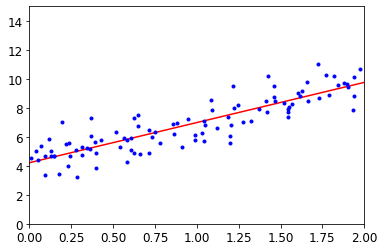

In [8]:
plt.plot(X_new ,y_predict ,'r-')
plt.plot(X ,y ,'b.')
plt.axis([0 ,2 ,0 ,15])
plt.show

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_ ,lin_reg.coef_

(array([3.48874588]), array([[1.0745015]]))

In [10]:
#LinearRegression class is based on the scipy.linalg.listsq() function
theta_best_svd ,residuals ,rank ,s = np.linalg.lstsq(X_b ,y ,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [11]:
print(residuals)
print(rank)
print(s)

[80.6584564]
2
[14.37020392  4.11961067]


In [12]:
#computing the pseudoinverse (Moore-Penrose inverse)
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [13]:
eta = .1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
print(theta)

for iteration in range(n_iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

[[0.01300189]
 [1.45353408]]


In [14]:
theta

array([[4.21509616],
       [2.77011339]])

In [15]:
type(X_b)

numpy.ndarray

In [16]:
temp = 6
print(type(X_b[temp]))
print(type(X_b[temp:temp+1]))
print(X_b[temp])
print(X_b[temp:temp+1])
print(X_b[temp].shape)
print(X_b[temp:temp+1].shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[1.         0.11616722]
[[1.         0.11616722]]
(2,)
(1, 2)


In [17]:
n_epochs = 50
t0 ,t1 = 5 ,50
j=1

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)
print("theta_prime:",theta,"\n")

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = (2)*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)        
        print("\ni:",i,"r_ind:",random_index)
        print("xi:",xi,"\nyi:",yi,"\ngradients:",gradients,"\neta:",eta)
        print(eta*gradients)
        print("j:",j)
        j+=1
        theta = theta - eta*gradients

theta_prime: [[-0.26465683]
 [ 2.72016917]] 


i: 0 r_ind: 68
xi: [[1.         0.14910129]] 
yi: [[4.70718666]] 
gradients: [[-9.13252553]
 [-1.36167131]] 
eta: 0.1
[[-0.91325255]
 [-0.13616713]]
j: 1

i: 1 r_ind: 60
xi: [[1.         0.77735458]] 
yi: [[5.54881045]] 
gradients: [[-5.35965725]
 [-4.16635411]] 
eta: 0.09803921568627451
[[-0.52545659]
 [-0.40846609]]
j: 2

i: 2 r_ind: 47
xi: [[1.         1.04013604]] 
yi: [[5.71855706]] 
gradients: [[-2.29733224]
 [-2.38953806]] 
eta: 0.09615384615384616
[[-0.22089733]
 [-0.22976327]]
j: 3

i: 3 r_ind: 18
xi: [[1.         0.86389004]] 
yi: [[6.19956196]] 
gradients: [[-3.57138371]
 [-3.08528281]] 
eta: 0.09433962264150944
[[-0.33692299]
 [-0.29106442]]
j: 4

i: 4 r_ind: 3
xi: [[1.         1.19731697]] 
yi: [[5.60438199]] 
gradients: [[1.32017954]
 [1.58067337]] 
eta: 0.09259259259259259
[[0.12223885]
 [0.14635865]]
j: 5

i: 5 r_ind: 34
xi: [[1.         1.93126407]] 
yi: [[7.87502098]] 
gradients: [[1.5260139 ]
 [2.94713581]] 
eta: 0.09090

 [0.32375272]] 
eta: 0.04424778761061947
[[0.08094099]
 [0.01432534]]
j: 64

i: 64 r_ind: 35
xi: [[1.        1.6167947]] 
yi: [[8.82387021]] 
gradients: [[0.43213322]
 [0.6986707 ]] 
eta: 0.043859649122807015
[[0.01895321]
 [0.03064345]]
j: 65

i: 65 r_ind: 44
xi: [[1.         0.51755996]] 
yi: [[6.34371184]] 
gradients: [[-1.91495775]
 [-0.99110546]] 
eta: 0.043478260869565216
[[-0.08325903]
 [-0.04309154]]
j: 66

i: 66 r_ind: 19
xi: [[1.         0.58245828]] 
yi: [[4.28385989]] 
gradients: [[2.84480016]
 [1.65697741]] 
eta: 0.04310344827586207
[[0.1226207 ]
 [0.07142144]]
j: 67

i: 67 r_ind: 64
xi: [[1.         0.56186902]] 
yi: [[5.91306699]] 
gradients: [[-0.87519458]
 [-0.49174472]] 
eta: 0.042735042735042736
[[-0.03740148]
 [-0.02101473]]
j: 68

i: 68 r_ind: 7
xi: [[1.         1.73235229]] 
yi: [[8.67878666]] 
gradients: [[1.30983352]
 [2.2690931 ]] 
eta: 0.0423728813559322
[[0.05550142]
 [0.09614801]]
j: 69

i: 69 r_ind: 15
xi: [[1.         0.36680902]] 
yi: [[6.06907205]] 
grad

xi: [[1.         1.89777107]] 
yi: [[9.61886731]] 
gradients: [[0.36489123]
 [0.69248001]] 
eta: 0.027777777777777776
[[0.01013587]
 [0.01923556]]
j: 131

i: 31 r_ind: 95
xi: [[1.         0.98759119]] 
yi: [[6.14696329]] 
gradients: [[1.69787574]
 [1.67680712]] 
eta: 0.027624309392265192
[[0.04690264]
 [0.04632064]]
j: 132

i: 32 r_ind: 47
xi: [[1.         1.04013604]] 
yi: [[5.71855706]] 
gradients: [[2.6830521 ]
 [2.79073919]] 
eta: 0.027472527472527472
[[0.07371022]
 [0.07666866]]
j: 133

i: 33 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.48938215]
 [-4.41722312]] 
eta: 0.0273224043715847
[[-0.06801591]
 [-0.12068916]]
j: 134

i: 34 r_ind: 0
xi: [[1.         0.74908024]] 
yi: [[6.33428778]] 
gradients: [[-0.23127493]
 [-0.17324348]] 
eta: 0.02717391304347826
[[-0.00628464]
 [-0.0047077 ]]
j: 135

i: 35 r_ind: 15
xi: [[1.         0.36680902]] 
yi: [[6.06907205]] 
gradients: [[-2.00040352]
 [-0.73376606]] 
eta: 0.02702702702702703
[[-0.05406496]
 [-0.0

j: 194

i: 94 r_ind: 32
xi: [[1.         0.13010319]] 
yi: [[4.64785995]] 
gradients: [[-0.36233521]
 [-0.04714097]] 
eta: 0.020491803278688523
[[-0.0074249]
 [-0.000966 ]]
j: 195

i: 95 r_ind: 60
xi: [[1.         0.77735458]] 
yi: [[5.54881045]] 
gradients: [[1.51091982]
 [1.17452044]] 
eta: 0.02040816326530612
[[0.0308351]
 [0.0239698]]
j: 196

i: 96 r_ind: 50
xi: [[1.         1.93916926]] 
yi: [[8.82697144]] 
gradients: [[1.36975417]
 [2.65618518]] 
eta: 0.02032520325203252
[[0.02784053]
 [0.0539875 ]]
j: 197

i: 97 r_ind: 42
xi: [[1.         0.06877704]] 
yi: [[5.34915394]] 
gradients: [[-2.2246816 ]
 [-0.15300702]] 
eta: 0.020242914979757085
[[-0.04503404]
 [-0.00309731]]
j: 198

i: 98 r_ind: 11
xi: [[1.        1.9398197]] 
yi: [[10.14821022]] 
gradients: [[-1.43212503]
 [-2.77806434]] 
eta: 0.020161290322580645
[[-0.02887349]
 [-0.05600936]]
j: 199

i: 99 r_ind: 66
xi: [[1.         0.28184845]] 
yi: [[3.23806212]] 
gradients: [[3.35028325]
 [0.94427214]] 
eta: 0.02008032128514056

gradients: [[-1.12831499]
 [-0.14342768]] 
eta: 0.01639344262295082
[[-0.01849697]
 [-0.00235127]]
j: 256

i: 56 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.2510549 ]
 [-3.99432919]] 
eta: 0.016339869281045753
[[-0.03678194]
 [-0.06526682]]
j: 257

i: 57 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.36697579]
 [-0.88903546]] 
eta: 0.016286644951140065
[[-0.02226345]
 [-0.0144794 ]]
j: 258

i: 58 r_ind: 12
xi: [[1.         1.66488528]] 
yi: [[8.46489564]] 
gradients: [[1.15519789]
 [1.92327197]] 
eta: 0.016233766233766232
[[0.01875321]
 [0.03122195]]
j: 259

i: 59 r_ind: 58
xi: [[1.         0.09045458]] 
yi: [[3.3519395]] 
gradients: [[2.16276218]
 [0.19563174]] 
eta: 0.016181229773462782
[[0.03499615]
 [0.00316556]]
j: 260

i: 60 r_ind: 18
xi: [[1.         0.86389004]] 
yi: [[6.19956196]] 
gradients: [[0.8510518 ]
 [0.73521517]] 
eta: 0.016129032258064516
[[0.01372664]
 [0.01185831]]
j: 261

i: 61 r_ind: 48
xi: [[1.      

i: 19 r_ind: 64
xi: [[1.         0.56186902]] 
yi: [[5.91306699]] 
gradients: [[-0.40176625]
 [-0.22574001]] 
eta: 0.013550135501355014
[[-0.00544399]
 [-0.00305881]]
j: 320

i: 20 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.54977879]
 [-1.00792443]] 
eta: 0.013513513513513514
[[-0.02094296]
 [-0.0136206 ]]
j: 321

i: 21 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.50735031]
 [0.91719928]] 
eta: 0.013477088948787063
[[0.02031469]
 [0.01236118]]
j: 322

i: 22 r_ind: 70
xi: [[1.         1.54448954]] 
yi: [[7.3965179]] 
gradients: [[2.06810055]
 [3.19415967]] 
eta: 0.013440860215053764
[[0.02779705]
 [0.04293225]]
j: 323

i: 23 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.65188139]
 [-4.70556592]] 
eta: 0.013404825737265416
[[-0.03554801]
 [-0.06307729]]
j: 324

i: 24 r_ind: 44
xi: [[1.         0.51755996]] 
yi: [[6.34371184]] 
gradients: [[-1.4540968 ]
 [-0.75258229]] 
eta: 0.0133689839572192

yi: [[8.48372443]] 
gradients: [[0.10176072]
 [0.14897646]] 
eta: 0.011547344110854504
[[0.00117507]
 [0.00172028]]
j: 384

i: 84 r_ind: 15
xi: [[1.         0.36680902]] 
yi: [[6.06907205]] 
gradients: [[-1.5514108 ]
 [-0.56907147]] 
eta: 0.01152073732718894
[[-0.0178734 ]
 [-0.00655612]]
j: 385

i: 85 r_ind: 86
xi: [[1.         1.45921236]] 
yi: [[9.53623265]] 
gradients: [[-1.98394561]
 [-2.89499795]] 
eta: 0.011494252873563218
[[-0.02280397]
 [-0.03327584]]
j: 386

i: 86 r_ind: 56
xi: [[1.       0.176985]] 
yi: [[3.4686513]] 
gradients: [[2.62462308]
 [0.46451893]] 
eta: 0.011467889908256881
[[0.03009889]
 [0.00532705]]
j: 387

i: 87 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.09942548]
 [-0.14055926]] 
eta: 0.011441647597254004
[[-0.00113759]
 [-0.00160823]]
j: 388

i: 88 r_ind: 11
xi: [[1.        1.9398197]] 
yi: [[10.14821022]] 
gradients: [[-0.26290014]
 [-0.50997886]] 
eta: 0.01141552511415525
[[-0.00300114]
 [-0.00582168]]
j: 389

i: 89 r_ind: 

yi: [[4.64785995]] 
gradients: [[-0.1873789 ]
 [-0.02437859]] 
eta: 0.010080645161290322
[[-0.0018889 ]
 [-0.00024575]]
j: 447

i: 47 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.4886875]
 [-0.4178679]] 
eta: 0.01006036217303823
[[-0.00491637]
 [-0.0042039 ]]
j: 448

i: 48 r_ind: 98
xi: [[1.         0.05083825]] 
yi: [[4.42920556]] 
gradients: [[-0.19647546]
 [-0.00998847]] 
eta: 0.010040160642570281
[[-0.00197265]
 [-0.00010029]]
j: 449

i: 49 r_ind: 0
xi: [[1.         0.74908024]] 
yi: [[6.33428778]] 
gradients: [[0.05991848]
 [0.04488375]] 
eta: 0.01002004008016032
[[0.00060039]
 [0.00044974]]
j: 450

i: 50 r_ind: 20
xi: [[1.         1.22370579]] 
yi: [[7.96723765]] 
gradients: [[-0.44675422]
 [-0.54669572]] 
eta: 0.01
[[-0.00446754]
 [-0.00546696]]
j: 451

i: 51 r_ind: 54
xi: [[1.         1.19579996]] 
yi: [[6.03673644]] 
gradients: [[3.27391778]
 [3.91495075]] 
eta: 0.00998003992015968
[[0.03267383]
 [0.03907136]]
j: 452

i: 52 r_ind: 5
xi: [[1.    

 [1.81654097]] 
eta: 0.009009009009009009
[[0.02293634]
 [0.01636523]]
j: 506

i: 6 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.71506446]
 [-0.61143877]] 
eta: 0.008992805755395683
[[-0.00643044]
 [-0.00549855]]
j: 507

i: 7 r_ind: 37
xi: [[1.         0.19534423]] 
yi: [[7.0492748]] 
gradients: [[-4.72176862]
 [-0.92237025]] 
eta: 0.008976660682226212
[[-0.04238571]
 [-0.0082798 ]]
j: 508

i: 8 r_ind: 49
xi: [[1.         0.36970891]] 
yi: [[7.29958236]] 
gradients: [[-4.14218116]
 [-1.53140129]] 
eta: 0.008960573476702509
[[-0.03711632]
 [-0.01372223]]
j: 509

i: 9 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.496169 ]
 [-0.4242652]] 
eta: 0.008944543828264758
[[-0.00443801]
 [-0.00379486]]
j: 510

i: 10 r_ind: 81
xi: [[1.         1.24659625]] 
yi: [[8.21362168]] 
gradients: [[-0.85368046]
 [-1.06419486]] 
eta: 0.008928571428571428
[[-0.00762215]
 [-0.00950174]]
j: 511

i: 11 r_ind: 29
xi: [[1.         0.09290083]] 
yi: [[

xi: [[1.         1.42648957]] 
yi: [[10.17626171]] 
gradients: [[-4.4905217 ]
 [-6.40568239]] 
eta: 0.008103727714748784
[[-0.03638997]
 [-0.05190991]]
j: 568

i: 68 r_ind: 41
xi: [[1.         0.99035382]] 
yi: [[5.80238342]] 
gradients: [[2.09055829]
 [2.07039239]] 
eta: 0.008090614886731391
[[0.0169139 ]
 [0.01675075]]
j: 569

i: 69 r_ind: 60
xi: [[1.         0.77735458]] 
yi: [[5.54881045]] 
gradients: [[1.37180414]
 [1.06637823]] 
eta: 0.008077544426494346
[[0.01108081]
 [0.00861372]]
j: 570

i: 70 r_ind: 21
xi: [[1.         0.27898772]] 
yi: [[5.09801844]] 
gradients: [[-0.46511212]
 [-0.12976057]] 
eta: 0.008064516129032258
[[-0.0037509 ]
 [-0.00104646]]
j: 571

i: 71 r_ind: 20
xi: [[1.         1.22370579]] 
yi: [[7.96723765]] 
gradients: [[-1.06970647]
 [-1.309006  ]] 
eta: 0.008051529790660225
[[-0.00861277]
 [-0.0105395 ]]
j: 572

i: 72 r_ind: 69
xi: [[1.         1.97377387]] 
yi: [[10.70314449]] 
gradients: [[-2.4130438 ]
 [-4.76280282]] 
eta: 0.008038585209003215
[[-0.019397

 [-0.89726743]] 
eta: 0.007363770250368188
[[-0.0101593 ]
 [-0.00660727]]
j: 630

i: 30 r_ind: 89
xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-0.69665161]
 [-0.65793857]] 
eta: 0.007352941176470588
[[-0.00512244]
 [-0.00483778]]
j: 631

i: 31 r_ind: 43
xi: [[1.        1.8186408]] 
yi: [[10.20785545]] 
gradients: [[-1.62816538]
 [-2.961048  ]] 
eta: 0.007342143906020558
[[-0.01195422]
 [-0.02174044]]
j: 632

i: 32 r_ind: 24
xi: [[1.         0.91213997]] 
yi: [[5.32104916]] 
gradients: [[3.05267208]
 [2.78446422]] 
eta: 0.007331378299120235
[[0.02238029]
 [0.02041396]]
j: 633

i: 33 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.63791425]
 [0.99664541]] 
eta: 0.007320644216691069
[[0.01199059]
 [0.00729609]]
j: 634

i: 34 r_ind: 12
xi: [[1.         1.66488528]] 
yi: [[8.46489564]] 
gradients: [[0.91845368]
 [1.52912001]] 
eta: 0.007309941520467836
[[0.00671384]
 [0.01117778]]
j: 635

i: 35 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.037

yi: [[3.4686513]] 
gradients: [[2.28132996]
 [0.40376119]] 
eta: 0.006747638326585695
[[0.01539359]
 [0.00272443]]
j: 692

i: 92 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.56331925]] 
gradients: [[-2.84583862]
 [-3.08885094]] 
eta: 0.006738544474393531
[[-0.01917681]
 [-0.02081436]]
j: 693

i: 93 r_ind: 78
xi: [[1.         0.71693146]] 
yi: [[6.44386684]] 
gradients: [[-0.6048891 ]
 [-0.43366402]] 
eta: 0.006729475100942127
[[-0.00407059]
 [-0.00291833]]
j: 694

i: 94 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.74779881]
 [-1.05717416]] 
eta: 0.006720430107526882
[[-0.00502553]
 [-0.00710467]]
j: 695

i: 95 r_ind: 7
xi: [[1.         1.73235229]] 
yi: [[8.67878666]] 
gradients: [[0.71446197]
 [1.23769983]] 
eta: 0.006711409395973154
[[0.00479505]
 [0.00830671]]
j: 696

i: 96 r_ind: 25
xi: [[1.         1.57035192]] 
yi: [[8.29041045]] 
gradients: [[0.5371224]
 [0.8434712]] 
eta: 0.006702412868632708
[[0.00360002]
 [0.00565329]]
j: 697

i: 97 r_ind: 


i: 57 r_ind: 0
xi: [[1.         0.74908024]] 
yi: [[6.33428778]] 
gradients: [[-0.10207906]
 [-0.07646541]] 
eta: 0.006195786864931847
[[-0.00063246]
 [-0.00047376]]
j: 758

i: 58 r_ind: 39
xi: [[1.         0.88030499]] 
yi: [[6.9424623]] 
gradients: [[-0.58926295]
 [-0.51873112]] 
eta: 0.006188118811881188
[[-0.00364643]
 [-0.00320997]]
j: 759

i: 59 r_ind: 63
xi: [[1.         0.71350665]] 
yi: [[4.90965564]] 
gradients: [[2.56390011]
 [1.82935979]] 
eta: 0.006180469715698393
[[0.01584611]
 [0.0113063 ]]
j: 760

i: 60 r_ind: 21
xi: [[1.         0.27898772]] 
yi: [[5.09801844]] 
gradients: [[-0.26153075]
 [-0.07296387]] 
eta: 0.006172839506172839
[[-0.00161439]
 [-0.00045039]]
j: 761

i: 61 r_ind: 59
xi: [[1.         0.65066066]] 
yi: [[7.50191639]] 
gradients: [[-3.01188045]
 [-1.95971213]] 
eta: 0.006165228113440197
[[-0.01856893]
 [-0.01208207]]
j: 762

i: 62 r_ind: 63
xi: [[1.         0.71350665]] 
yi: [[4.90965564]] 
gradients: [[2.57432429]
 [1.83679751]] 
eta: 0.006157635467980

i: 23 r_ind: 32
xi: [[1.         0.13010319]] 
yi: [[4.64785995]] 
gradients: [[-0.34237355]
 [-0.04454389]] 
eta: 0.0057273768613974796
[[-0.0019609 ]
 [-0.00025512]]
j: 824

i: 24 r_ind: 67
xi: [[1.         1.60439396]] 
yi: [[8.99781574]] 
gradients: [[-1.12899807]
 [-1.81135768]] 
eta: 0.005720823798627002
[[-0.0064588 ]
 [-0.01036246]]
j: 825

i: 25 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.70152037]
 [-1.10661209]] 
eta: 0.005714285714285714
[[-0.00972297]
 [-0.0063235 ]]
j: 826

i: 26 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.56331925]] 
gradients: [[-2.97576912]
 [-3.22987649]] 
eta: 0.005707762557077625
[[-0.01698498]
 [-0.01843537]]
j: 827

i: 27 r_ind: 9
xi: [[1.         1.41614516]] 
yi: [[7.74667842]] 
gradients: [[0.52916365]
 [0.74937253]] 
eta: 0.005701254275940707
[[0.0030169 ]
 [0.00427236]]
j: 828

i: 28 r_ind: 4
xi: [[1.         0.31203728]] 
yi: [[4.71643995]] 
gradients: [[0.58004935]
 [0.18099702]] 
eta: 0.005694760820045

 [3.81464961]] 
eta: 0.0053475935828877
[[0.01051955]
 [0.0203992 ]]
j: 886

i: 86 r_ind: 28
xi: [[1.         1.18482914]] 
yi: [[7.3932017]] 
gradients: [[0.48805346]
 [0.57825996]] 
eta: 0.005341880341880342
[[0.00260712]
 [0.003089  ]]
j: 887

i: 87 r_ind: 77
xi: [[1.        0.1480893]] 
yi: [[4.67652161]] 
gradients: [[0.07905267]
 [0.01170686]] 
eta: 0.005336179295624333
[[4.21839232e-04]
 [6.24698780e-05]]
j: 888

i: 88 r_ind: 39
xi: [[1.         0.88030499]] 
yi: [[6.9424623]] 
gradients: [[-0.33636495]
 [-0.29610375]] 
eta: 0.005330490405117271
[[-0.00179299]
 [-0.00157838]]
j: 889

i: 89 r_ind: 40
xi: [[1.         0.24407647]] 
yi: [[4.69751764]] 
gradients: [[0.58030085]
 [0.14163778]] 
eta: 0.005324813631522897
[[0.00308999]
 [0.00075419]]
j: 890

i: 90 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.22229891]
 [-0.79494244]] 
eta: 0.005319148936170213
[[-0.00650159]
 [-0.00422842]]
j: 891

i: 91 r_ind: 10
xi: [[1.         0.04116899]] 
yi: [[5.0

i: 50 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-4.22397235]
 [-7.29145001]] 
eta: 0.005
[[-0.02111986]
 [-0.03645725]]
j: 951

i: 51 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.84828266]
 [-0.10783089]] 
eta: 0.004995004995004995
[[-0.00423718]
 [-0.00053862]]
j: 952

i: 52 r_ind: 48
xi: [[1.         1.09342056]] 
yi: [[7.86711877]] 
gradients: [[-1.17610332]
 [-1.28597555]] 
eta: 0.00499001996007984
[[-0.00586878]
 [-0.00641704]]
j: 953

i: 53 r_ind: 19
xi: [[1.         0.58245828]] 
yi: [[4.28385989]] 
gradients: [[3.19546043]
 [1.86122239]] 
eta: 0.004985044865403789
[[0.01592951]
 [0.00927828]]
j: 954

i: 54 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.38223399]
 [-0.89895888]] 
eta: 0.0049800796812749
[[-0.00688364]
 [-0.00447689]]
j: 955

i: 55 r_ind: 91
xi: [[1.         1.42648957]] 
yi: [[10.17626171]] 
gradients: [[-3.96172891]
 [-5.65136498]] 
eta: 0.004975124378109453
[[-0.019710

yi: [[3.3519395]] 
gradients: [[2.36356128]
 [0.21379494]] 
eta: 0.004699248120300752
[[0.01110696]
 [0.00100468]]
j: 1015

i: 15 r_ind: 71
xi: [[1.         0.39743136]] 
yi: [[3.87183748]] 
gradients: [[2.99974669]
 [1.19219342]] 
eta: 0.004694835680751174
[[0.01408332]
 [0.00559715]]
j: 1016

i: 16 r_ind: 53
xi: [[1.        1.7896547]] 
yi: [[8.86548845]] 
gradients: [[0.66684667]
 [1.19342528]] 
eta: 0.004690431519699813
[[0.0031278 ]
 [0.00559768]]
j: 1017

i: 17 r_ind: 66
xi: [[1.         0.28184845]] 
yi: [[3.23806212]] 
gradients: [[3.58709169]
 [1.01101623]] 
eta: 0.004686035613870665
[[0.01680924]
 [0.00473766]]
j: 1018

i: 18 r_ind: 50
xi: [[1.         1.93916926]] 
yi: [[8.82697144]] 
gradients: [[1.48945186]
 [2.88829925]] 
eta: 0.0046816479400749065
[[0.00697309]
 [0.013522  ]]
j: 1019

i: 19 r_ind: 96
xi: [[1.         1.04546566]] 
yi: [[7.05929527]] 
gradients: [[0.0665657 ]
 [0.06959216]] 
eta: 0.004677268475210477
[[0.00031135]
 [0.0003255 ]]
j: 1020

i: 20 r_ind: 91
x

xi: [[1.         0.98759119]] 
yi: [[6.14696329]] 
gradients: [[1.76280035]
 [1.7409261 ]] 
eta: 0.004432624113475178
[[0.00781383]
 [0.00771687]]
j: 1079

i: 79 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-3.95522919]
 [-6.82754373]] 
eta: 0.0044286979627989375
[[-0.01751652]
 [-0.03023713]]
j: 1080

i: 80 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-3.81580508]
 [-6.58686888]] 
eta: 0.004424778761061947
[[-0.01688409]
 [-0.02914544]]
j: 1081

i: 81 r_ind: 13
xi: [[1.         0.42467822]] 
yi: [[5.7873021]] 
gradients: [[-0.56006783]
 [-0.23784861]] 
eta: 0.004420866489832007
[[-0.00247599]
 [-0.0010515 ]]
j: 1082

i: 82 r_ind: 8
xi: [[1.         1.20223002]] 
yi: [[6.79819647]] 
gradients: [[1.84221133]
 [2.21476177]] 
eta: 0.00441696113074205
[[0.00813698]
 [0.00978252]]
j: 1083

i: 83 r_ind: 39
xi: [[1.         0.88030499]] 
yi: [[6.9424623]] 
gradients: [[-0.30906738]
 [-0.27207356]] 
eta: 0.00441306266548985
[[-0.00136

[[-0.00045366]
 [-0.00073347]]
j: 1143

i: 43 r_ind: 58
xi: [[1.         0.09045458]] 
yi: [[3.3519395]] 
gradients: [[2.31441555]
 [0.20934948]] 
eta: 0.004191114836546521
[[0.00969998]
 [0.00087741]]
j: 1144

i: 44 r_ind: 38
xi: [[1.         1.36846605]] 
yi: [[7.91303719]] 
gradients: [[0.30808201]
 [0.42159977]] 
eta: 0.0041876046901172526
[[0.00129013]
 [0.00176549]]
j: 1145

i: 45 r_ind: 98
xi: [[1.         0.05083825]] 
yi: [[4.42920556]] 
gradients: [[-0.08362172]
 [-0.00425118]] 
eta: 0.0041841004184100415
[[-3.49881659e-04]
 [-1.77873725e-05]]
j: 1146

i: 46 r_ind: 53
xi: [[1.        1.7896547]] 
yi: [[8.86548845]] 
gradients: [[0.74663275]
 [1.33621481]] 
eta: 0.004180602006688963
[[0.00312137]
 [0.00558618]]
j: 1147

i: 47 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.56564159]
 [-0.48366997]] 
eta: 0.004177109440267335
[[-0.00236275]
 [-0.00202034]]
j: 1148

i: 48 r_ind: 54
xi: [[1.         1.19579996]] 
yi: [[6.03673644]] 
gradients: [[3.080

 [0.00457944]]
j: 1205

i: 5 r_ind: 24
xi: [[1.         0.91213997]] 
yi: [[5.32104916]] 
gradients: [[2.85554011]
 [2.60465226]] 
eta: 0.00398406374501992
[[0.01137665]
 [0.0103771 ]]
j: 1206

i: 6 r_ind: 81
xi: [[1.         1.24659625]] 
yi: [[8.21362168]] 
gradients: [[-1.0998094 ]
 [-1.37101828]] 
eta: 0.003980891719745223
[[-0.00437822]
 [-0.00545788]]
j: 1207

i: 7 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.26423066]
 [-4.01770859]] 
eta: 0.003977724741447892
[[-0.00900649]
 [-0.01598134]]
j: 1208

i: 8 r_ind: 11
xi: [[1.        1.9398197]] 
yi: [[10.14821022]] 
gradients: [[-0.98004782]
 [-1.90111608]] 
eta: 0.00397456279809221
[[-0.00389526]
 [-0.00755611]]
j: 1209

i: 9 r_ind: 14
xi: [[1.         0.36364993]] 
yi: [[5.18802735]] 
gradients: [[0.06642366]
 [0.02415496]] 
eta: 0.003971405877680699
[[2.63795328e-04]
 [9.59291537e-05]]
j: 1210

i: 10 r_ind: 58
xi: [[1.         0.09045458]] 
yi: [[3.3519395]] 
gradients: [[2.19352299]
 [0.1984142 

xi: [[1.         1.89777107]] 
yi: [[9.61886731]] 
gradients: [[-0.37503594]
 [-0.71173237]] 
eta: 0.003787878787878788
[[-0.00142059]
 [-0.00269596]]
j: 1271

i: 71 r_ind: 29
xi: [[1.         0.09290083]] 
yi: [[4.68275333]] 
gradients: [[-0.5102452]
 [-0.0474022]] 
eta: 0.003785011355034065
[[-0.00193128]
 [-0.00017942]]
j: 1272

i: 72 r_ind: 12
xi: [[1.         1.66488528]] 
yi: [[8.46489564]] 
gradients: [[0.65747585]
 [1.09462186]] 
eta: 0.0037821482602118004
[[0.00248667]
 [0.00414002]]
j: 1273

i: 73 r_ind: 12
xi: [[1.         1.66488528]] 
yi: [[8.46489564]] 
gradients: [[0.63871718]
 [1.06339083]] 
eta: 0.003779289493575208
[[0.0024139 ]
 [0.00401886]]
j: 1274

i: 74 r_ind: 17
xi: [[1.         1.04951286]] 
yi: [[6.82087644]] 
gradients: [[0.50186277]
 [0.52671143]] 
eta: 0.0037764350453172208
[[0.00189525]
 [0.00198909]]
j: 1275

i: 75 r_ind: 31
xi: [[1.         0.34104825]] 
yi: [[5.19772255]] 
gradients: [[-0.17901543]
 [-0.0610529 ]] 
eta: 0.0037735849056603774
[[-0.000675

 [0.00383194]]
j: 1334

i: 34 r_ind: 19
xi: [[1.         0.58245828]] 
yi: [[4.28385989]] 
gradients: [[2.82902089]
 [1.64778664]] 
eta: 0.0036127167630057803
[[0.01022045]
 [0.00595299]]
j: 1335

i: 35 r_ind: 92
xi: [[1.        1.5215701]] 
yi: [[8.31932218]] 
gradients: [[-0.16184736]
 [-0.2462621 ]] 
eta: 0.0036101083032490976
[[-0.00058429]
 [-0.00088903]]
j: 1336

i: 36 r_ind: 62
xi: [[1.         1.65747502]] 
yi: [[9.78594227]] 
gradients: [[-2.3518425 ]
 [-3.89812019]] 
eta: 0.0036075036075036075
[[-0.00848428]
 [-0.01406248]]
j: 1337

i: 37 r_ind: 53
xi: [[1.        1.7896547]] 
yi: [[8.86548845]] 
gradients: [[0.2754721 ]
 [0.49299993]] 
eta: 0.003604902667627974
[[0.00099305]
 [0.00177722]]
j: 1338

i: 38 r_ind: 73
xi: [[1.         1.63092286]] 
yi: [[9.18975324]] 
gradients: [[-1.24886253]
 [-2.03679844]] 
eta: 0.0036023054755043226
[[-0.00449878]
 [-0.00733717]]
j: 1339

i: 39 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.90051925]
 [-0.770017

j: 1392

i: 92 r_ind: 71
xi: [[1.         0.39743136]] 
yi: [[3.87183748]] 
gradients: [[2.70977157]
 [1.07694821]] 
eta: 0.0034674063800277394
[[0.00939588]
 [0.00373422]]
j: 1393

i: 93 r_ind: 4
xi: [[1.         0.31203728]] 
yi: [[4.71643995]] 
gradients: [[0.52804114]
 [0.16476852]] 
eta: 0.003465003465003465
[[0.00182966]
 [0.00057092]]
j: 1394

i: 94 r_ind: 47
xi: [[1.         1.04013604]] 
yi: [[5.71855706]] 
gradients: [[2.53286561]
 [2.63452481]] 
eta: 0.0034626038781163434
[[0.00877031]
 [0.00912232]]
j: 1395

i: 95 r_ind: 89
xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-1.08443806]
 [-1.02417568]] 
eta: 0.0034602076124567475
[[-0.00375238]
 [-0.00354386]]
j: 1396

i: 96 r_ind: 17
xi: [[1.         1.04951286]] 
yi: [[6.82087644]] 
gradients: [[0.35816405]
 [0.37589778]] 
eta: 0.003457814661134163
[[0.00123846]
 [0.00129978]]
j: 1397

i: 97 r_ind: 69
xi: [[1.         1.97377387]] 
yi: [[10.70314449]] 
gradients: [[-2.33002673]
 [-4.59894589]] 
eta: 0.0034554

 [-0.01553574]]
j: 1454

i: 54 r_ind: 81
xi: [[1.         1.24659625]] 
yi: [[8.21362168]] 
gradients: [[-0.96538941]
 [-1.20345082]] 
eta: 0.003324468085106383
[[-0.00320941]
 [-0.00400083]]
j: 1455

i: 55 r_ind: 99
xi: [[1.         0.21578285]] 
yi: [[5.47453181]] 
gradients: [[-1.33519094]
 [-0.28811131]] 
eta: 0.0033222591362126247
[[-0.00443585]
 [-0.00095718]]
j: 1456

i: 56 r_ind: 1
xi: [[1.         1.90142861]] 
yi: [[9.40527849]] 
gradients: [[0.40559289]
 [0.77120592]] 
eta: 0.0033200531208499337
[[0.00134659]
 [0.00256044]]
j: 1457

i: 57 r_ind: 77
xi: [[1.        0.1480893]] 
yi: [[4.67652161]] 
gradients: [[-0.11858057]
 [-0.01756051]] 
eta: 0.0033178500331785005
[[-3.93432539e-04]
 [-5.82631506e-05]]
j: 1458

i: 58 r_ind: 76
xi: [[1.         1.54254069]] 
yi: [[7.94759736]] 
gradients: [[1.268902  ]
 [1.95733297]] 
eta: 0.0033156498673740055
[[0.00420723]
 [0.00648983]]
j: 1459

i: 59 r_ind: 92
xi: [[1.        1.5215701]] 
yi: [[8.31932218]] 
gradients: [[0.37804993]
 [0.

xi: [[1.         1.45801434]] 
yi: [[8.72049122]] 
gradients: [[-0.91387534]
 [-1.33244334]] 
eta: 0.00319693094629156
[[-0.0029216 ]
 [-0.00425973]]
j: 1515

i: 15 r_ind: 6
xi: [[1.         0.11616722]] 
yi: [[5.82639572]] 
gradients: [[-2.64528475]
 [-0.30729539]] 
eta: 0.003194888178913738
[[-0.00845139]
 [-0.00098177]]
j: 1516

i: 16 r_ind: 28
xi: [[1.         1.18482914]] 
yi: [[7.3932017]] 
gradients: [[0.24357185]
 [0.28859102]] 
eta: 0.0031928480204342275
[[0.00077769]
 [0.00092143]]
j: 1517

i: 17 r_ind: 10
xi: [[1.         0.04116899]] 
yi: [[5.03890908]] 
gradients: [[-1.47626388]
 [-0.06077629]] 
eta: 0.003190810465858328
[[-0.00471048]
 [-0.00019393]]
j: 1518

i: 18 r_ind: 32
xi: [[1.         0.13010319]] 
yi: [[4.64785995]] 
gradients: [[-0.18509302]
 [-0.02408119]] 
eta: 0.0031887755102040817
[[-5.90220103e-04]
 [-7.67895158e-05]]
j: 1519

i: 19 r_ind: 5
xi: [[1.         0.31198904]] 
yi: [[5.29307969]] 
gradients: [[-0.45246259]
 [-0.14116337]] 
eta: 0.00318674314850223

yi: [[4.85532818]] 
gradients: [[0.90853933]
 [0.36282297]] 
eta: 0.003073140749846343
[[0.00279207]
 [0.00111501]]
j: 1578

i: 78 r_ind: 71
xi: [[1.         0.39743136]] 
yi: [[3.87183748]] 
gradients: [[2.85824963]
 [1.13595805]] 
eta: 0.003071253071253071
[[0.00877841]
 [0.00348881]]
j: 1579

i: 79 r_ind: 59
xi: [[1.         0.65066066]] 
yi: [[7.50191639]] 
gradients: [[-2.99723989]
 [-1.95018609]] 
eta: 0.003069367710251688
[[-0.00919963]
 [-0.00598584]]
j: 1580

i: 80 r_ind: 45
xi: [[1.         1.32504457]] 
yi: [[7.06574625]] 
gradients: [[1.70432594]
 [2.25830784]] 
eta: 0.003067484662576687
[[0.00522799]
 [0.00692732]]
j: 1581

i: 81 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.23834386]
 [-3.97177439]] 
eta: 0.0030656039239730227
[[-0.00686188]
 [-0.01217589]]
j: 1582

i: 82 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.55779294]
 [0.94789284]] 
eta: 0.0030637254901960784
[[0.00477265]
 [0.00290408]]
j: 1583

i: 8

j: 1638

i: 38 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.47542988]
 [-0.95957038]] 
eta: 0.002962085308056872
[[-0.00437035]
 [-0.00284233]]
j: 1639

i: 39 r_ind: 50
xi: [[1.         1.93916926]] 
yi: [[8.82697144]] 
gradients: [[1.57248385]
 [3.04931233]] 
eta: 0.002960331557134399
[[0.00465507]
 [0.00902698]]
j: 1640

i: 40 r_ind: 87
xi: [[1.         1.27511494]] 
yi: [[7.00466251]] 
gradients: [[1.46825373]
 [1.87219227]] 
eta: 0.0029585798816568047
[[0.00434395]
 [0.00553903]]
j: 1641

i: 41 r_ind: 40
xi: [[1.         0.24407647]] 
yi: [[4.69751764]] 
gradients: [[0.31934646]
 [0.07794496]] 
eta: 0.0029568302779420462
[[0.00094425]
 [0.00023047]]
j: 1642

i: 42 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.49428074]
 [0.90924665]] 
eta: 0.002955082742316785
[[0.00441572]
 [0.0026869 ]]
j: 1643

i: 43 r_ind: 75
xi: [[1.         1.45801434]] 
yi: [[8.72049122]] 
gradients: [[-0.9871385 ]
 [-1.43926208]] 
eta: 0.00295333

gradients: [[0.36714412]
 [0.08961124]] 
eta: 0.0028538812785388126
[[0.00104779]
 [0.00025574]]
j: 1703

i: 3 r_ind: 59
xi: [[1.         0.65066066]] 
yi: [[7.50191639]] 
gradients: [[-2.97029368]
 [-1.93265325]] 
eta: 0.002852253280091272
[[-0.00847203]
 [-0.00551242]]
j: 1704

i: 4 r_ind: 13
xi: [[1.         0.42467822]] 
yi: [[5.7873021]] 
gradients: [[-0.78311133]
 [-0.33257033]] 
eta: 0.0028506271379703536
[[-0.00223236]
 [-0.00094803]]
j: 1705

i: 5 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.64313398]
 [-0.90920795]] 
eta: 0.002849002849002849
[[-0.00183229]
 [-0.00259034]]
j: 1706

i: 6 r_ind: 81
xi: [[1.         1.24659625]] 
yi: [[8.21362168]] 
gradients: [[-1.01365043]
 [-1.26361283]] 
eta: 0.0028473804100227792
[[-0.00288625]
 [-0.00359799]]
j: 1707

i: 7 r_ind: 11
xi: [[1.        1.9398197]] 
yi: [[10.14821022]] 
gradients: [[-0.97410812]
 [-1.88959412]] 
eta: 0.0028457598178713715
[[-0.00277208]
 [-0.00537733]]
j: 1708

i: 8 r_ind: 86
xi:

xi: [[1.         0.71693146]] 
yi: [[6.44386684]] 
gradients: [[-0.46206837]
 [-0.33127135]] 
eta: 0.00275178866263071
[[-0.00127151]
 [-0.00091159]]
j: 1768

i: 68 r_ind: 33
xi: [[1.         1.89777107]] 
yi: [[9.61886731]] 
gradients: [[-0.19156827]
 [-0.36355272]] 
eta: 0.0027502750275027505
[[-0.00052687]
 [-0.00099987]]
j: 1769

i: 69 r_ind: 35
xi: [[1.        1.6167947]] 
yi: [[8.82387021]] 
gradients: [[-0.17169456]
 [-0.27759486]] 
eta: 0.002748763056624519
[[-0.00047195]
 [-0.00076304]]
j: 1770

i: 70 r_ind: 5
xi: [[1.         0.31198904]] 
yi: [[5.29307969]] 
gradients: [[-0.42257808]
 [-0.13183973]] 
eta: 0.0027472527472527475
[[-0.00116093]
 [-0.0003622 ]]
j: 1771

i: 71 r_ind: 38
xi: [[1.         1.36846605]] 
yi: [[7.91303719]] 
gradients: [[0.26434946]
 [0.36175326]] 
eta: 0.0027457440966501922
[[0.00072584]
 [0.00099328]]
j: 1772

i: 72 r_ind: 41
xi: [[1.         0.99035382]] 
yi: [[5.80238342]] 
gradients: [[2.36193785]
 [2.33915418]] 
eta: 0.0027442371020856204
[[0.00

 [0.04020858]] 
eta: 0.0026624068157614484
[[0.00014291]
 [0.00010705]]
j: 1829

i: 29 r_ind: 4
xi: [[1.         0.31203728]] 
yi: [[4.71643995]] 
gradients: [[0.81322301]
 [0.2537559 ]] 
eta: 0.0026609898882384245
[[0.00216398]
 [0.00067524]]
j: 1830

i: 30 r_ind: 19
xi: [[1.         0.58245828]] 
yi: [[4.28385989]] 
gradients: [[3.20511404]
 [1.86684521]] 
eta: 0.0026595744680851063
[[0.00852424]
 [0.00496501]]
j: 1831

i: 31 r_ind: 7
xi: [[1.         1.73235229]] 
yi: [[8.67878666]] 
gradients: [[0.89322582]
 [1.54738179]] 
eta: 0.002658160552897395
[[0.00237434]
 [0.00411319]]
j: 1832

i: 32 r_ind: 42
xi: [[1.         0.06877704]] 
yi: [[5.34915394]] 
gradients: [[-1.85766044]
 [-0.12776439]] 
eta: 0.002656748140276302
[[-0.00493534]
 [-0.00033944]]
j: 1833

i: 33 r_ind: 75
xi: [[1.         1.45801434]] 
yi: [[8.72049122]] 
gradients: [[-0.74700473]
 [-1.0891436 ]] 
eta: 0.0026553372278279343
[[-0.00198355]
 [-0.00289204]]
j: 1834

i: 34 r_ind: 0
xi: [[1.         0.74908024]] 
yi: 

i: 94 r_ind: 28
xi: [[1.         1.18482914]] 
yi: [[7.3932017]] 
gradients: [[0.32493008]
 [0.38498663]] 
eta: 0.00257201646090535
[[0.00083573]
 [0.00099019]]
j: 1895

i: 95 r_ind: 95
xi: [[1.         0.98759119]] 
yi: [[6.14696329]] 
gradients: [[1.70636168]
 [1.68518777]] 
eta: 0.002570694087403599
[[0.00438653]
 [0.0043321 ]]
j: 1896

i: 96 r_ind: 4
xi: [[1.         0.31203728]] 
yi: [[4.71643995]] 
gradients: [[0.76428477]
 [0.23848534]] 
eta: 0.0025693730729701952
[[0.00196373]
 [0.00061276]]
j: 1897

i: 97 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.3879363 ]
 [-0.90266747]] 
eta: 0.0025680534155110425
[[-0.00356429]
 [-0.0023181 ]]
j: 1898

i: 98 r_ind: 46
xi: [[1.         0.62342215]] 
yi: [[7.27306077]] 
gradients: [[-2.59863337]
 [-1.62004561]] 
eta: 0.002566735112936345
[[-0.00667   ]
 [-0.00415823]]
j: 1899

i: 99 r_ind: 33
xi: [[1.         1.89777107]] 
yi: [[9.61886731]] 
gradients: [[-0.11534537]
 [-0.2188991 ]] 
eta: 0.0025654181631605

i: 57 r_ind: 70
xi: [[1.         1.54448954]] 
yi: [[7.3965179]] 
gradients: [[2.42487415]
 [3.74519275]] 
eta: 0.002491280518186348
[[0.00604104]
 [0.00933033]]
j: 1958

i: 58 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.09853606]
 [-3.72369587]] 
eta: 0.00249003984063745
[[-0.00522544]
 [-0.00927215]]
j: 1959

i: 59 r_ind: 84
xi: [[1.         0.62196464]] 
yi: [[4.89121226]] 
gradients: [[2.20982065]
 [1.37443031]] 
eta: 0.0024888003982080635
[[0.0054998 ]
 [0.00342068]]
j: 1960

i: 60 r_ind: 14
xi: [[1.         0.36364993]] 
yi: [[5.18802735]] 
gradients: [[0.1399801 ]
 [0.05090375]] 
eta: 0.0024875621890547263
[[0.00034821]
 [0.00012663]]
j: 1961

i: 61 r_ind: 64
xi: [[1.         0.56186902]] 
yi: [[5.91306699]] 
gradients: [[-0.18986624]
 [-0.10667996]] 
eta: 0.002486325211337643
[[-0.00047207]
 [-0.00026524]]
j: 1962

i: 62 r_ind: 75
xi: [[1.         1.45801434]] 
yi: [[8.72049122]] 
gradients: [[-0.73487702]
 [-1.07146123]] 
eta: 0.00248508946322

j: 2017

i: 17 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.59388711]
 [-0.83958693]] 
eta: 0.0024189646831156266
[[-0.00143659]
 [-0.00203093]]
j: 2018

i: 18 r_ind: 50
xi: [[1.         1.93916926]] 
yi: [[8.82697144]] 
gradients: [[1.70701809]
 [3.31019701]] 
eta: 0.0024177949709864605
[[0.00412722]
 [0.00800338]]
j: 2019

i: 19 r_ind: 14
xi: [[1.         0.36364993]] 
yi: [[5.18802735]] 
gradients: [[0.08671604]
 [0.03153428]] 
eta: 0.002416626389560174
[[2.09560272e-04]
 [7.62065791e-05]]
j: 2020

i: 20 r_ind: 67
xi: [[1.         1.60439396]] 
yi: [[8.99781574]] 
gradients: [[-0.55701694]
 [-0.89367462]] 
eta: 0.0024154589371980675
[[-0.00134545]
 [-0.00215863]]
j: 2021

i: 21 r_ind: 20
xi: [[1.         1.22370579]] 
yi: [[7.96723765]] 
gradients: [[-0.62837814]
 [-0.76894997]] 
eta: 0.0024142926122646064
[[-0.00151709]
 [-0.00185647]]
j: 2022

i: 22 r_ind: 12
xi: [[1.         1.66488528]] 
yi: [[8.46489564]] 
gradients: [[0.86804163]
 [1.44518973]] 

yi: [[3.87183748]] 
gradients: [[2.88859762]
 [1.14801929]] 
eta: 0.002347417840375587
[[0.00678075]
 [0.00269488]]
j: 2081

i: 81 r_ind: 23
xi: [[1.         0.73272369]] 
yi: [[5.96358393]] 
gradients: [[0.55648653]
 [0.40775086]] 
eta: 0.002346316283435007
[[0.00130569]
 [0.00095671]]
j: 2082

i: 82 r_ind: 79
xi: [[1.         0.23173812]] 
yi: [[3.98086294]] 
gradients: [[1.72912054]
 [0.40070314]] 
eta: 0.0023452157598499064
[[0.00405516]
 [0.00093974]]
j: 2083

i: 83 r_ind: 48
xi: [[1.         1.09342056]] 
yi: [[7.86711877]] 
gradients: [[-1.25690075]
 [-1.37432112]] 
eta: 0.0023441162681669013
[[-0.00294632]
 [-0.00322157]]
j: 2084

i: 84 r_ind: 25
xi: [[1.         1.57035192]] 
yi: [[8.29041045]] 
gradients: [[0.56652419]
 [0.88964235]] 
eta: 0.0023430178069353325
[[0.00132738]
 [0.00208445]]
j: 2085

i: 85 r_ind: 90
xi: [[1.         0.23918849]] 
yi: [[5.53962564]] 
gradients: [[-1.35170949]
 [-0.32331335]] 
eta: 0.00234192037470726
[[-0.0031656 ]
 [-0.00075717]]
j: 2086

i: 86

xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-0.90093516]
 [-0.85087006]] 
eta: 0.0022820629849383844
[[-0.00205599]
 [-0.00194174]]
j: 2142

i: 42 r_ind: 41
xi: [[1.         0.99035382]] 
yi: [[5.80238342]] 
gradients: [[2.24783142]
 [2.22614844]] 
eta: 0.002281021897810219
[[0.00512735]
 [0.00507789]]
j: 2143

i: 43 r_ind: 31
xi: [[1.         0.34104825]] 
yi: [[5.19772255]] 
gradients: [[-0.14232254]
 [-0.04853885]] 
eta: 0.002279981760145919
[[-0.00032449]
 [-0.00011067]]
j: 2144

i: 44 r_ind: 38
xi: [[1.         1.36846605]] 
yi: [[7.91303719]] 
gradients: [[0.09142899]
 [0.12511747]] 
eta: 0.0022789425706472195
[[0.00020836]
 [0.00028514]]
j: 2145

i: 45 r_ind: 35
xi: [[1.        1.6167947]] 
yi: [[8.82387021]] 
gradients: [[-0.36266034]
 [-0.58634732]] 
eta: 0.002277904328018223
[[-0.00082611]
 [-0.00133564]]
j: 2146

i: 46 r_ind: 96
xi: [[1.         1.04546566]] 
yi: [[7.05929527]] 
gradients: [[0.02180027]
 [0.02279144]] 
eta: 0.002276867030965392
[[4.963631

xi: [[1.         1.46398788]] 
yi: [[8.48372443]] 
gradients: [[-0.23123893]
 [-0.338531  ]] 
eta: 0.0022172949002217295
[[-0.00051272]
 [-0.00075062]]
j: 2206

i: 6 r_ind: 15
xi: [[1.         0.36680902]] 
yi: [[6.06907205]] 
gradients: [[-1.59198189]
 [-0.58395332]] 
eta: 0.002216312056737589
[[-0.00352833]
 [-0.00129422]]
j: 2207

i: 7 r_ind: 29
xi: [[1.         0.09290083]] 
yi: [[4.68275333]] 
gradients: [[-0.35818326]
 [-0.03327552]] 
eta: 0.002215330084182543
[[-7.93494156e-04]
 [-7.37162621e-05]]
j: 2208

i: 8 r_ind: 22
xi: [[1.        0.5842893]] 
yi: [[5.75798135]] 
gradients: [[0.26805767]
 [0.15662323]] 
eta: 0.0022143489813994687
[[0.00059357]
 [0.00034682]]
j: 2209

i: 9 r_ind: 91
xi: [[1.         1.42648957]] 
yi: [[10.17626171]] 
gradients: [[-3.81438808]
 [-5.44118482]] 
eta: 0.002213368747233289
[[-0.00844265]
 [-0.01204335]]
j: 2210

i: 10 r_ind: 4
xi: [[1.         0.31203728]] 
yi: [[4.71643995]] 
gradients: [[0.83660599]
 [0.26105226]] 
eta: 0.0022123893805309734
[

i: 70 r_ind: 14
xi: [[1.         0.36364993]] 
yi: [[5.18802735]] 
gradients: [[0.17397834]
 [0.06326721]] 
eta: 0.0021551724137931034
[[0.00037495]
 [0.00013635]]
j: 2271

i: 71 r_ind: 20
xi: [[1.         1.22370579]] 
yi: [[7.96723765]] 
gradients: [[-0.55805483]
 [-0.68289493]] 
eta: 0.002154243860404998
[[-0.00120219]
 [-0.00147112]]
j: 2272

i: 72 r_ind: 34
xi: [[1.         1.93126407]] 
yi: [[7.87502098]] 
gradients: [[3.60577827]
 [6.96371001]] 
eta: 0.002153316106804479
[[0.00776438]
 [0.01499507]]
j: 2273

i: 73 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.56331925]] 
gradients: [[-2.56901304]
 [-2.78838663]] 
eta: 0.002152389151958674
[[-0.00552952]
 [-0.00600169]]
j: 2274

i: 74 r_ind: 90
xi: [[1.         0.23918849]] 
yi: [[5.53962564]] 
gradients: [[-1.23429602]
 [-0.2952294 ]] 
eta: 0.0021514629948364886
[[-0.00265554]
 [-0.00063518]]
j: 2275

i: 75 r_ind: 1
xi: [[1.         1.90142861]] 
yi: [[9.40527849]] 
gradients: [[0.34677431]
 [0.65936659]] 
eta: 0.002150537634

xi: [[1.         1.41614516]] 
yi: [[7.74667842]] 
gradients: [[0.92057594]
 [1.30366916]] 
eta: 0.0020973154362416107
[[0.00193074]
 [0.00273421]]
j: 2335

i: 35 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.17087828]
 [-3.85206175]] 
eta: 0.0020964360587002098
[[-0.00455111]
 [-0.0080756 ]]
j: 2336

i: 36 r_ind: 1
xi: [[1.         1.90142861]] 
yi: [[9.40527849]] 
gradients: [[0.34067734]
 [0.64777364]] 
eta: 0.0020955574182732607
[[0.00071391]
 [0.00135745]]
j: 2337

i: 37 r_ind: 10
xi: [[1.         0.04116899]] 
yi: [[5.03890908]] 
gradients: [[-1.34306666]
 [-0.0552927 ]] 
eta: 0.0020946795140343527
[[-0.00281329]
 [-0.00011582]]
j: 2338

i: 38 r_ind: 49
xi: [[1.         0.36970891]] 
yi: [[7.29958236]] 
gradients: [[-4.02021278]
 [-1.48630849]] 
eta: 0.0020938023450586263
[[-0.00841753]
 [-0.00311204]]
j: 2339

i: 39 r_ind: 30
xi: [[1.        1.2150897]] 
yi: [[9.53145501]] 
gradients: [[-3.72866803]
 [-4.53066613]] 
eta: 0.002092925910422771
[[-0.

yi: [[6.34371184]] 
gradients: [[-1.25249835]
 [-0.648243  ]] 
eta: 0.002044153720359771
[[-0.0025603 ]
 [-0.00132511]]
j: 2397

i: 97 r_ind: 31
xi: [[1.         0.34104825]] 
yi: [[5.19772255]] 
gradients: [[0.0584989 ]
 [0.01995095]] 
eta: 0.002043318348998774
[[1.19531871e-04]
 [4.07661352e-05]]
j: 2398

i: 98 r_ind: 35
xi: [[1.        1.6167947]] 
yi: [[8.82387021]] 
gradients: [[-0.05715729]
 [-0.0924116 ]] 
eta: 0.002042483660130719
[[-0.00011674]
 [-0.00018875]]
j: 2399

i: 99 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-3.88523765]
 [-6.70672385]] 
eta: 0.002041649652919559
[[-0.00793229]
 [-0.01369278]]
j: 2400

i: 0 r_ind: 98
xi: [[1.         0.05083825]] 
yi: [[4.42920556]] 
gradients: [[-0.01074571]
 [-0.00054629]] 
eta: 0.0020408163265306124
[[-2.19300305e-05]
 [-1.11488445e-06]]
j: 2401

i: 1 r_ind: 59
xi: [[1.         0.65066066]] 
yi: [[7.50191639]] 
gradients: [[-2.78388377]
 [-1.81136366]] 
eta: 0.002039983680130559
[[-0.00567908]
 [-0.0

 [-3.23679113]] 
eta: 0.0019984012789768186
[[-0.00355673]
 [-0.00646841]]
j: 2453

i: 53 r_ind: 64
xi: [[1.         0.56186902]] 
yi: [[5.91306699]] 
gradients: [[-0.16409023]
 [-0.09219721]] 
eta: 0.001997602876548142
[[-0.00032779]
 [-0.00018417]]
j: 2454

i: 54 r_ind: 86
xi: [[1.         1.45921236]] 
yi: [[9.53623265]] 
gradients: [[-2.40795347]
 [-3.51371546]] 
eta: 0.001996805111821086
[[-0.00480821]
 [-0.0070162 ]]
j: 2455

i: 55 r_ind: 7
xi: [[1.         1.73235229]] 
yi: [[8.67878666]] 
gradients: [[0.86328933]
 [1.49552125]] 
eta: 0.001996007984031936
[[0.00172313]
 [0.00298507]]
j: 2456

i: 56 r_ind: 76
xi: [[1.         1.54254069]] 
yi: [[7.94759736]] 
gradients: [[1.2523785]
 [1.9318448]] 
eta: 0.0019952114924181963
[[0.00249876]
 [0.00385444]]
j: 2457

i: 57 r_ind: 71
xi: [[1.         0.39743136]] 
yi: [[3.87183748]] 
gradients: [[3.00400307]
 [1.19388503]] 
eta: 0.001994415636218588
[[0.00599123]
 [0.0023811 ]]
j: 2458

i: 58 r_ind: 86
xi: [[1.         1.45921236]] 
yi:

yi: [[5.53962564]] 
gradients: [[-1.21328537]
 [-0.2902039 ]] 
eta: 0.001953125
[[-0.0023697]
 [-0.0005668]]
j: 2511

i: 11 r_ind: 1
xi: [[1.         1.90142861]] 
yi: [[9.40527849]] 
gradients: [[0.33451374]
 [0.636054  ]] 
eta: 0.001952362358453729
[[0.00065309]
 [0.00124181]]
j: 2512

i: 12 r_ind: 12
xi: [[1.         1.66488528]] 
yi: [[8.46489564]] 
gradients: [[0.89009809]
 [1.48191121]] 
eta: 0.00195160031225605
[[0.00173712]
 [0.0028921 ]]
j: 2513

i: 13 r_ind: 52
xi: [[1.         1.87899788]] 
yi: [[9.73664501]] 
gradients: [[-0.47368213]
 [-0.89004772]] 
eta: 0.0019508388607101053
[[-0.00092408]
 [-0.00173634]]
j: 2514

i: 14 r_ind: 31
xi: [[1.         0.34104825]] 
yi: [[5.19772255]] 
gradients: [[0.03926726]
 [0.01339203]] 
eta: 0.0019500780031201249
[[7.65742147e-05]
 [2.61155017e-05]]
j: 2515

i: 15 r_ind: 94
xi: [[1.         1.54193436]] 
yi: [[7.73628865]] 
gradients: [[1.6562165 ]
 [2.55377712]] 
eta: 0.001949317738791423
[[0.00322849]
 [0.00497812]]
j: 2516

i: 16 r_in

 [0.00385613]]
j: 2576

i: 76 r_ind: 43
xi: [[1.        1.8186408]] 
yi: [[10.20785545]] 
gradients: [[-1.82403934]
 [-3.31727237]] 
eta: 0.001904036557501904
[[-0.00347304]
 [-0.00631621]]
j: 2577

i: 77 r_ind: 76
xi: [[1.         1.54254069]] 
yi: [[7.94759736]] 
gradients: [[1.19360957]
 [1.84119133]] 
eta: 0.001903311762466692
[[0.00227181]
 [0.00350436]]
j: 2578

i: 78 r_ind: 21
xi: [[1.         0.27898772]] 
yi: [[5.09801844]] 
gradients: [[-0.12842552]
 [-0.03582914]] 
eta: 0.001902587519025875
[[-2.44340790e-04]
 [-6.81680803e-05]]
j: 2579

i: 79 r_ind: 42
xi: [[1.         0.06877704]] 
yi: [[5.34915394]] 
gradients: [[-1.795723  ]
 [-0.12350452]] 
eta: 0.001901863826550019
[[-0.00341522]
 [-0.00023489]]
j: 2580

i: 80 r_ind: 36
xi: [[1.         0.60922754]] 
yi: [[5.88791282]] 
gradients: [[0.13050669]
 [0.07950827]] 
eta: 0.0019011406844106464
[[0.00024811]
 [0.00015116]]
j: 2581

i: 81 r_ind: 60
xi: [[1.         0.77735458]] 
yi: [[5.54881045]] 
gradients: [[1.74027163]
 [1.

xi: [[1.         0.05083825]] 
yi: [[4.42920556]] 
gradients: [[-0.11648966]
 [-0.00592213]] 
eta: 0.001859427296392711
[[-2.16604051e-04]
 [-1.10117716e-05]]
j: 2640

i: 40 r_ind: 25
xi: [[1.         1.57035192]] 
yi: [[8.29041045]] 
gradients: [[0.53241915]
 [0.83608544]] 
eta: 0.0018587360594795538
[[0.00098963]
 [0.00155406]]
j: 2641

i: 41 r_ind: 36
xi: [[1.         0.60922754]] 
yi: [[5.88791282]] 
gradients: [[0.03878107]
 [0.0236265 ]] 
eta: 0.0018580453363062058
[[7.20569894e-05]
 [4.38991023e-05]]
j: 2642

i: 42 r_ind: 84
xi: [[1.         0.62196464]] 
yi: [[4.89121226]] 
gradients: [[2.10211163]
 [1.30743911]] 
eta: 0.0018573551263001485
[[0.00390437]
 [0.00242838]]
j: 2643

i: 43 r_ind: 53
xi: [[1.        1.7896547]] 
yi: [[8.86548845]] 
gradients: [[0.56604171]
 [1.01301921]] 
eta: 0.001856665428889714
[[0.00105095]
 [0.00188084]]
j: 2644

i: 44 r_ind: 20
xi: [[1.         1.22370579]] 
yi: [[7.96723765]] 
gradients: [[-0.75737351]
 [-0.92680234]] 
eta: 0.001855976243504083

xi: [[1.         0.51755996]] 
yi: [[6.34371184]] 
gradients: [[-1.39884141]
 [-0.72398431]] 
eta: 0.001819505094614265
[[-0.0025452 ]
 [-0.00131729]]
j: 2699

i: 99 r_ind: 32
xi: [[1.         0.13010319]] 
yi: [[4.64785995]] 
gradients: [[-0.12842907]
 [-0.01670903]] 
eta: 0.0018188432157148053
[[-2.33592347e-04]
 [-3.03911086e-05]]
j: 2700

i: 0 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.5480579 ]
 [0.94196921]] 
eta: 0.0018181818181818182
[[0.00281465]
 [0.00171267]]
j: 2701

i: 1 r_ind: 69
xi: [[1.         1.97377387]] 
yi: [[10.70314449]] 
gradients: [[-2.12615747]
 [-4.19655406]] 
eta: 0.0018175209014903672
[[-0.00386434]
 [-0.00762732]]
j: 2702

i: 2 r_ind: 3
xi: [[1.         1.19731697]] 
yi: [[5.60438199]] 
gradients: [[3.83600709]
 [4.59291638]] 
eta: 0.001816860465116279
[[0.00696949]
 [0.00834469]]
j: 2703

i: 3 r_ind: 19
xi: [[1.         0.58245828]] 
yi: [[4.28385989]] 
gradients: [[3.06954217]
 [1.78788025]] 
eta: 0.0018162005085361425
[[

xi: [[1.         0.65066066]] 
yi: [[7.50191639]] 
gradients: [[-3.003104  ]
 [-1.95400164]] 
eta: 0.001783166904422254
[[-0.00535504]
 [-0.00348431]]
j: 2755

i: 55 r_ind: 56
xi: [[1.       0.176985]] 
yi: [[3.4686513]] 
gradients: [[2.48338657]
 [0.43952218]] 
eta: 0.0017825311942959
[[0.00442671]
 [0.00078346]]
j: 2756

i: 56 r_ind: 30
xi: [[1.        1.2150897]] 
yi: [[9.53145501]] 
gradients: [[-3.96516979]
 [-4.81803699]] 
eta: 0.001781895937277263
[[-0.00706552]
 [-0.00858524]]
j: 2757

i: 57 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.92108718]
 [-0.11708556]] 
eta: 0.0017812611328820805
[[-0.0016407 ]
 [-0.00020856]]
j: 2758

i: 58 r_ind: 23
xi: [[1.         0.73272369]] 
yi: [[5.96358393]] 
gradients: [[0.55872885]
 [0.40939386]] 
eta: 0.0017806267806267807
[[0.00099489]
 [0.00072898]]
j: 2759

i: 59 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.36777945]
 [-4.2014482 ]] 
eta: 0.00177999288002848
[[-0.00421463]
 [

 [0.00020508]]
j: 2841

i: 41 r_ind: 38
xi: [[1.         1.36846605]] 
yi: [[7.91303719]] 
gradients: [[0.31435308]
 [0.43018153]] 
eta: 0.0017295053614666206
[[0.00054368]
 [0.000744  ]]
j: 2842

i: 42 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.33696512]
 [-0.86951752]] 
eta: 0.0017289073305670815
[[-0.00231149]
 [-0.00150332]]
j: 2843

i: 43 r_ind: 48
xi: [[1.         1.09342056]] 
yi: [[7.86711877]] 
gradients: [[-1.12029358]
 [-1.22495204]] 
eta: 0.0017283097131005876
[[-0.00193621]
 [-0.0021171 ]]
j: 2844

i: 44 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.67233256]
 [1.01758842]] 
eta: 0.0017277125086385626
[[0.00288931]
 [0.0017581 ]]
j: 2845

i: 45 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.52777143]
 [-0.45128787]] 
eta: 0.0017271157167530224
[[-0.00091152]
 [-0.00077943]]
j: 2846

i: 46 r_ind: 69
xi: [[1.         1.97377387]] 
yi: [[10.70314449]] 
gradients: [[-1.88406558]
 [-3.

xi: [[1.         0.39196572]] 
yi: [[5.64948961]] 
gradients: [[-0.54574593]
 [-0.2139137 ]] 
eta: 0.0017006802721088435
[[-0.00092814]
 [-0.0003638 ]]
j: 2891

i: 91 r_ind: 27
xi: [[1.         1.02846888]] 
yi: [[6.28312936]] 
gradients: [[1.76582938]
 [1.81610056]] 
eta: 0.0017001020061203672
[[0.00300209]
 [0.00308756]]
j: 2892

i: 92 r_ind: 25
xi: [[1.         1.57035192]] 
yi: [[8.29041045]] 
gradients: [[0.78057886]
 [1.22578352]] 
eta: 0.001699524133242692
[[0.00132661]
 [0.00208325]]
j: 2893

i: 93 r_ind: 62
xi: [[1.         1.65747502]] 
yi: [[9.78594227]] 
gradients: [[-1.73100954]
 [-2.86910506]] 
eta: 0.0016989466530750934
[[-0.00294089]
 [-0.00487446]]
j: 2894

i: 94 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.56331925]] 
gradients: [[-2.47809929]
 [-2.68970955]] 
eta: 0.0016983695652173913
[[-0.00420873]
 [-0.00456812]]
j: 2895

i: 95 r_ind: 24
xi: [[1.         0.91213997]] 
yi: [[5.32104916]] 
gradients: [[3.04973545]
 [2.78178559]] 
eta: 0.001697792869269949
[[0.00

i: 51 r_ind: 8
xi: [[1.         1.20223002]] 
yi: [[6.79819647]] 
gradients: [[1.66649892]
 [2.00351504]] 
eta: 0.0016661112962345886
[[0.00277657]
 [0.00333808]]
j: 2952

i: 52 r_ind: 11
xi: [[1.        1.9398197]] 
yi: [[10.14821022]] 
gradients: [[-0.91762208]
 [-1.78002138]] 
eta: 0.0016655562958027982
[[-0.00152835]
 [-0.00296473]]
j: 2953

i: 53 r_ind: 10
xi: [[1.         0.04116899]] 
yi: [[5.03890908]] 
gradients: [[-1.32554696]
 [-0.05457143]] 
eta: 0.001665001665001665
[[-2.20703789e-03]
 [-9.08615179e-05]]
j: 2954

i: 54 r_ind: 45
xi: [[1.         1.32504457]] 
yi: [[7.06574625]] 
gradients: [[1.82098053]
 [2.41288035]] 
eta: 0.0016644474034620505
[[0.00303093]
 [0.00401611]]
j: 2955

i: 55 r_ind: 15
xi: [[1.         0.36680902]] 
yi: [[6.06907205]] 
gradients: [[-1.56533394]
 [-0.57417861]] 
eta: 0.0016638935108153079
[[-0.00260455]
 [-0.00095537]]
j: 2956

i: 56 r_ind: 0
xi: [[1.         0.74908024]] 
yi: [[6.33428778]] 
gradients: [[0.05033274]
 [0.03770326]] 
eta: 0.0016

eta: 0.0016318537859007832
[[-0.00097871]
 [-0.00138361]]
j: 3015

i: 15 r_ind: 56
xi: [[1.       0.176985]] 
yi: [[3.4686513]] 
gradients: [[2.55624743]
 [0.45241746]] 
eta: 0.0016313213703099511
[[0.00417006]
 [0.00073804]]
j: 3016

i: 16 r_ind: 22
xi: [[1.        0.5842893]] 
yi: [[5.75798135]] 
gradients: [[0.23945944]
 [0.13991359]] 
eta: 0.0016307893020221786
[[0.00039051]
 [0.00022817]]
j: 3017

i: 17 r_ind: 47
xi: [[1.         1.04013604]] 
yi: [[5.71855706]] 
gradients: [[2.85812043]
 [2.97283407]] 
eta: 0.0016302575806977503
[[0.00465947]
 [0.00484649]]
j: 3018

i: 18 r_ind: 21
xi: [[1.         0.27898772]] 
yi: [[5.09801844]] 
gradients: [[-0.15541665]
 [-0.04335934]] 
eta: 0.0016297262059973925
[[-2.53286587e-04]
 [-7.06638477e-05]]
j: 3019

i: 19 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.62781177]
 [0.99049821]] 
eta: 0.0016291951775822744
[[0.00265202]
 [0.00161371]]
j: 3020

i: 20 r_ind: 68
xi: [[1.         0.14910129]] 
yi: [[4.70718666

yi: [[3.87183748]] 
gradients: [[2.96836504]
 [1.17972136]] 
eta: 0.0015989766549408379
[[0.00474635]
 [0.00188635]]
j: 3078

i: 78 r_ind: 61
xi: [[1.         0.54269806]] 
yi: [[5.30603267]] 
gradients: [[0.89543237]
 [0.48594941]] 
eta: 0.00159846547314578
[[0.00143132]
 [0.00077677]]
j: 3079

i: 79 r_ind: 34
xi: [[1.         1.93126407]] 
yi: [[7.87502098]] 
gradients: [[3.4602334 ]
 [6.68262442]] 
eta: 0.0015979546180888463
[[0.0055293 ]
 [0.01067853]]
j: 3080

i: 80 r_ind: 18
xi: [[1.         0.86389004]] 
yi: [[6.19956196]] 
gradients: [[0.85776137]
 [0.7410115 ]] 
eta: 0.001597444089456869
[[0.00137023]
 [0.00118372]]
j: 3081

i: 81 r_ind: 29
xi: [[1.         0.09290083]] 
yi: [[4.68275333]] 
gradients: [[-0.37407366]
 [-0.03475175]] 
eta: 0.0015969338869370809
[[-5.97370911e-04]
 [-5.54962508e-05]]
j: 3082

i: 82 r_ind: 77
xi: [[1.        0.1480893]] 
yi: [[4.67652161]] 
gradients: [[-0.0554146 ]
 [-0.00820631]] 
eta: 0.0015964240102171138
[[-8.84652042e-05]
 [-1.31007505e-05]]

eta: 0.00157035175879397
[[0.00071266]
 [0.00017394]]
j: 3135

i: 35 r_ind: 54
xi: [[1.         1.19579996]] 
yi: [[6.03673644]] 
gradients: [[3.04994625]
 [3.6471256 ]] 
eta: 0.0015698587127158557
[[0.00478798]
 [0.00572547]]
j: 3136

i: 36 r_ind: 15
xi: [[1.         0.36680902]] 
yi: [[6.06907205]] 
gradients: [[-1.62417953]
 [-0.5957637 ]] 
eta: 0.001569365976145637
[[-0.00254893]
 [-0.00093497]]
j: 3137

i: 37 r_ind: 92
xi: [[1.        1.5215701]] 
yi: [[8.31932218]] 
gradients: [[0.27169092]
 [0.41339677]] 
eta: 0.0015688735487919673
[[0.00042625]
 [0.00064857]]
j: 3138

i: 38 r_ind: 61
xi: [[1.         0.54269806]] 
yi: [[5.30603267]] 
gradients: [[0.87951771]
 [0.47731256]] 
eta: 0.0015683814303638645
[[0.00137942]
 [0.00074861]]
j: 3139

i: 39 r_ind: 47
xi: [[1.         1.04013604]] 
yi: [[5.71855706]] 
gradients: [[2.80238924]
 [2.91486605]] 
eta: 0.0015678896205707118
[[0.00439384]
 [0.00457019]]
j: 3140

i: 40 r_ind: 29
xi: [[1.         0.09290083]] 
yi: [[4.68275333]] 
grad

eta: 0.0015427337241592102
[[0.00581956]
 [0.00696785]]
j: 3192

i: 92 r_ind: 21
xi: [[1.         0.27898772]] 
yi: [[5.09801844]] 
gradients: [[-0.24494428]
 [-0.06833645]] 
eta: 0.0015422578655151142
[[-0.00037777]
 [-0.00010539]]
j: 3193

i: 93 r_ind: 75
xi: [[1.         1.45801434]] 
yi: [[8.72049122]] 
gradients: [[-1.06738261]
 [-1.55625915]] 
eta: 0.001541782300339192
[[-0.00164567]
 [-0.00239941]]
j: 3194

i: 94 r_ind: 44
xi: [[1.         0.51755996]] 
yi: [[6.34371184]] 
gradients: [[-1.43033282]
 [-0.740283  ]] 
eta: 0.0015413070283600493
[[-0.00220458]
 [-0.001141  ]]
j: 3195

i: 95 r_ind: 66
xi: [[1.         0.28184845]] 
yi: [[3.23806212]] 
gradients: [[3.50106019]
 [0.98676839]] 
eta: 0.0015408320493066256
[[0.00539455]
 [0.00152044]]
j: 3196

i: 96 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.50216878]
 [-0.97696047]] 
eta: 0.0015403573629081946
[[-0.00231388]
 [-0.00150487]]
j: 3197

i: 97 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.

yi: [[5.88791282]] 
gradients: [[-0.0863894]
 [-0.0526308]] 
eta: 0.001516530178950561
[[-1.31012128e-04]
 [-7.98161962e-05]]
j: 3248

i: 48 r_ind: 48
xi: [[1.         1.09342056]] 
yi: [[7.86711877]] 
gradients: [[-1.42536175]
 [-1.55851984]] 
eta: 0.0015160703456640388
[[-0.00216095]
 [-0.00236283]]
j: 3249

i: 49 r_ind: 40
xi: [[1.         0.24407647]] 
yi: [[4.69751764]] 
gradients: [[0.32507294]
 [0.07934266]] 
eta: 0.001515610791148833
[[0.00049268]
 [0.00012025]]
j: 3250

i: 50 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.44504118]
 [0.87928514]] 
eta: 0.0015151515151515152
[[0.00218946]
 [0.00133225]]
j: 3251

i: 51 r_ind: 87
xi: [[1.         1.27511494]] 
yi: [[7.00466251]] 
gradients: [[1.28364495]
 [1.63679485]] 
eta: 0.001514692517418964
[[0.00194433]
 [0.00247924]]
j: 3252

i: 52 r_ind: 20
xi: [[1.         1.22370579]] 
yi: [[7.96723765]] 
gradients: [[-0.92963593]
 [-1.13760087]] 
eta: 0.0015142337976983646
[[-0.00140769]
 [-0.00172259]]
j: 

 [-3.50932262]] 
eta: 0.001488095238095238
[[-0.0031507 ]
 [-0.00522221]]
j: 3311

i: 11 r_ind: 28
xi: [[1.         1.18482914]] 
yi: [[7.3932017]] 
gradients: [[0.1118985]
 [0.1325806]] 
eta: 0.001487652484379649
[[0.00016647]
 [0.00019723]]
j: 3312

i: 12 r_ind: 73
xi: [[1.         1.63092286]] 
yi: [[9.18975324]] 
gradients: [[-1.04719004]
 [-1.70788616]] 
eta: 0.00148720999405116
[[-0.00155739]
 [-0.00253999]]
j: 3313

i: 13 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.56331925]] 
gradients: [[-2.76324324]
 [-2.99920257]] 
eta: 0.0014867677668748143
[[-0.0041083 ]
 [-0.00445912]]
j: 3314

i: 14 r_ind: 50
xi: [[1.         1.93916926]] 
yi: [[8.82697144]] 
gradients: [[1.39928311]
 [2.71344679]] 
eta: 0.0014863258026159335
[[0.00207979]
 [0.00403307]]
j: 3315

i: 15 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.82093871]
 [-1.16057311]] 
eta: 0.0014858841010401188
[[-0.00121982]
 [-0.00172448]]
j: 3316

i: 16 r_ind: 76
xi: [[1.         1.54254069]] 

i: 73 r_ind: 22
xi: [[1.        0.5842893]] 
yi: [[5.75798135]] 
gradients: [[0.14957362]
 [0.08739427]] 
eta: 0.001460706982179375
[[0.00021848]
 [0.00012766]]
j: 3374

i: 74 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.77202498]
 [-1.09142306]] 
eta: 0.0014602803738317756
[[-0.00112737]
 [-0.00159378]]
j: 3375

i: 75 r_ind: 47
xi: [[1.         1.04013604]] 
yi: [[5.71855706]] 
gradients: [[2.73202218]
 [2.84167473]] 
eta: 0.00145985401459854
[[0.00398835]
 [0.00414843]]
j: 3376

i: 76 r_ind: 31
xi: [[1.         0.34104825]] 
yi: [[5.19772255]] 
gradients: [[-0.07122757]
 [-0.02429204]] 
eta: 0.0014594279042615295
[[-1.03951497e-04]
 [-3.54524759e-05]]
j: 3377

i: 77 r_ind: 56
xi: [[1.       0.176985]] 
yi: [[3.4686513]] 
gradients: [[2.48869987]
 [0.44046256]] 
eta: 0.0014590020426028597
[[0.00363102]
 [0.00064264]]
j: 3378

i: 78 r_ind: 99
xi: [[1.         0.21578285]] 
yi: [[5.47453181]] 
gradients: [[-1.31813479]
 [-0.28443089]] 
eta: 0.001458576429

j: 3436

i: 36 r_ind: 29
xi: [[1.         0.09290083]] 
yi: [[4.68275333]] 
gradients: [[-0.39534033]
 [-0.03672744]] 
eta: 0.001434308663224326
[[-5.67040055e-04]
 [-5.26784891e-05]]
j: 3437

i: 37 r_ind: 41
xi: [[1.         0.99035382]] 
yi: [[5.80238342]] 
gradients: [[2.25991138]
 [2.23811187]] 
eta: 0.0014338973329509608
[[0.00324048]
 [0.00320922]]
j: 3438

i: 38 r_ind: 36
xi: [[1.         0.60922754]] 
yi: [[5.88791282]] 
gradients: [[0.0003679 ]
 [0.00022414]] 
eta: 0.0014334862385321102
[[5.27385459e-07]
 [3.21297745e-07]]
j: 3439

i: 39 r_ind: 41
xi: [[1.         0.99035382]] 
yi: [[5.80238342]] 
gradients: [[2.24707219]
 [2.22539653]] 
eta: 0.0014330753797649756
[[0.00322022]
 [0.00318916]]
j: 3440

i: 40 r_ind: 34
xi: [[1.         1.93126407]] 
yi: [[7.87502098]] 
gradients: [[3.20731756]
 [6.19417715]] 
eta: 0.0014326647564469914
[[0.00459501]
 [0.00887418]]
j: 3441

i: 41 r_ind: 86
xi: [[1.         1.45921236]] 
yi: [[9.53623265]] 
gradients: [[-2.71801825]
 [-3.96616581]

eta: 0.00140964195094446
[[0.00108753]
 [0.0009395 ]]
j: 3498

i: 98 r_ind: 63
xi: [[1.         0.71350665]] 
yi: [[4.90965564]] 
gradients: [[2.52801938]
 [1.80375865]] 
eta: 0.0014092446448703494
[[0.0035626 ]
 [0.00254194]]
j: 3499

i: 99 r_ind: 90
xi: [[1.         0.23918849]] 
yi: [[5.53962564]] 
gradients: [[-1.32496971]
 [-0.31691751]] 
eta: 0.0014088475626937165
[[-0.00186668]
 [-0.00044649]]
j: 3500

i: 0 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.70095239]
 [-0.5993718 ]] 
eta: 0.0014084507042253522
[[-0.00098726]
 [-0.00084419]]
j: 3501

i: 1 r_ind: 10
xi: [[1.         0.04116899]] 
yi: [[5.03890908]] 
gradients: [[-1.39578592]
 [-0.05746309]] 
eta: 0.0014080540692762602
[[-1.96534205e-03]
 [-8.09111442e-05]]
j: 3502

i: 2 r_ind: 53
xi: [[1.        1.7896547]] 
yi: [[8.86548845]] 
gradients: [[0.47894513]
 [0.85714641]] 
eta: 0.0014076576576576576
[[0.00067419]
 [0.00120657]]
j: 3503

i: 3 r_ind: 44
xi: [[1.         0.51755996]] 
yi: [[6.343

i: 51 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-4.17261625]
 [-7.20279876]] 
eta: 0.0013885031935573452
[[-0.00579369]
 [-0.01000111]]
j: 3552

i: 52 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-4.1265009 ]
 [-7.12319413]] 
eta: 0.00138811771238201
[[-0.00572807]
 [-0.00988783]]
j: 3553

i: 53 r_ind: 96
xi: [[1.         1.04546566]] 
yi: [[7.05929527]] 
gradients: [[0.13757913]
 [0.14383426]] 
eta: 0.0013877324451845685
[[0.00019092]
 [0.0001996 ]]
j: 3554

i: 54 r_ind: 95
xi: [[1.         0.98759119]] 
yi: [[6.14696329]] 
gradients: [[1.64250823]
 [1.62212666]] 
eta: 0.0013873473917869034
[[0.00227873]
 [0.00225045]]
j: 3555

i: 55 r_ind: 71
xi: [[1.         0.39743136]] 
yi: [[3.87183748]] 
gradients: [[2.93415018]
 [1.1661233 ]] 
eta: 0.0013869625520110957
[[0.00406956]
 [0.00161737]]
j: 3556

i: 56 r_ind: 18
xi: [[1.         0.86389004]] 
yi: [[6.19956196]] 
gradients: [[0.83623702]
 [0.72241683]] 
eta: 0.001386577925

 [0.00850346]]
j: 3612

i: 12 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.56331925]] 
gradients: [[-2.79405308]
 [-3.03264332]] 
eta: 0.001365374112506827
[[-0.00381493]
 [-0.00414069]]
j: 3613

i: 13 r_ind: 62
xi: [[1.         1.65747502]] 
yi: [[9.78594227]] 
gradients: [[-2.10704497]
 [-3.4923744 ]] 
eta: 0.001365001365001365
[[-0.00287612]
 [-0.0047671 ]]
j: 3614

i: 14 r_ind: 22
xi: [[1.        0.5842893]] 
yi: [[5.75798135]] 
gradients: [[0.11549435]
 [0.06748211]] 
eta: 0.0013646288209606986
[[1.57606922e-04]
 [9.20880377e-05]]
j: 3615

i: 15 r_ind: 8
xi: [[1.         1.20223002]] 
yi: [[6.79819647]] 
gradients: [[1.40580258]
 [1.69009806]] 
eta: 0.001364256480218281
[[0.00191788]
 [0.00230573]]
j: 3616

i: 16 r_ind: 33
xi: [[1.         1.89777107]] 
yi: [[9.61886731]] 
gradients: [[-0.45361828]
 [-0.86086365]] 
eta: 0.001363884342607747
[[-0.00061868]
 [-0.00117412]]
j: 3617

i: 17 r_ind: 45
xi: [[1.         1.32504457]] 
yi: [[7.06574625]] 
gradients: [[1.53511766]
 [2.03

i: 75 r_ind: 31
xi: [[1.         0.34104825]] 
yi: [[5.19772255]] 
gradients: [[-0.05746177]
 [-0.01959723]] 
eta: 0.0013422818791946308
[[-7.71298872e-05]
 [-2.63050128e-05]]
j: 3676

i: 76 r_ind: 61
xi: [[1.         0.54269806]] 
yi: [[5.30603267]] 
gradients: [[0.83449735]
 [0.4528801 ]] 
eta: 0.0013419216317767043
[[0.00111983]
 [0.00060773]]
j: 3677

i: 77 r_ind: 73
xi: [[1.         1.63092286]] 
yi: [[9.18975324]] 
gradients: [[-0.95552805]
 [-1.55839253]] 
eta: 0.0013415615776764154
[[-0.0012819 ]
 [-0.00209068]]
j: 3678

i: 78 r_ind: 9
xi: [[1.         1.41614516]] 
yi: [[7.74667842]] 
gradients: [[0.75880075]
 [1.074572  ]] 
eta: 0.0013412017167381974
[[0.0010177 ]
 [0.00144122]]
j: 3679

i: 79 r_ind: 99
xi: [[1.         0.21578285]] 
yi: [[5.47453181]] 
gradients: [[-1.30114676]
 [-0.28076516]] 
eta: 0.0013408420488066506
[[-0.00174463]
 [-0.00037646]]
j: 3680

i: 80 r_ind: 71
xi: [[1.         0.39743136]] 
yi: [[3.87183748]] 
gradients: [[2.90651168]
 [1.1551389 ]] 
eta: 0.0

xi: [[1.        1.8186408]] 
yi: [[10.20785545]] 
gradients: [[-1.86650825]
 [-3.39450807]] 
eta: 0.0013206550449022716
[[-0.00246501]
 [-0.00448297]]
j: 3737

i: 37 r_ind: 67
xi: [[1.         1.60439396]] 
yi: [[8.99781574]] 
gradients: [[-0.61226929]
 [-0.98232114]] 
eta: 0.0013203063110641669
[[-0.00080838]
 [-0.00129696]]
j: 3738

i: 38 r_ind: 99
xi: [[1.         0.21578285]] 
yi: [[5.47453181]] 
gradients: [[-1.25739487]
 [-0.27132425]] 
eta: 0.0013199577613516368
[[-0.00165971]
 [-0.00035814]]
j: 3739

i: 39 r_ind: 81
xi: [[1.         1.24659625]] 
yi: [[8.21362168]] 
gradients: [[-1.01726629]
 [-1.26812035]] 
eta: 0.0013196093956188968
[[-0.00134239]
 [-0.00167342]]
j: 3740

i: 40 r_ind: 14
xi: [[1.         0.36364993]] 
yi: [[5.18802735]] 
gradients: [[0.14276568]
 [0.05191673]] 
eta: 0.0013192612137203166
[[1.88345228e-04]
 [6.84917297e-05]]
j: 3741

i: 41 r_ind: 50
xi: [[1.         1.93916926]] 
yi: [[8.82697144]] 
gradients: [[1.60419474]
 [3.11080513]] 
eta: 0.0013189132155

 [-0.00077538]]
j: 3799

i: 99 r_ind: 8
xi: [[1.         1.20223002]] 
yi: [[6.79819647]] 
gradients: [[1.53647986]
 [1.84720222]] 
eta: 0.0012990387113535984
[[0.00199595]
 [0.00239959]]
j: 3800

i: 0 r_ind: 72
xi: [[1.         0.01104423]] 
yi: [[4.55507427]] 
gradients: [[-0.56413117]
 [-0.0062304 ]] 
eta: 0.0012987012987012987
[[-7.32637878e-04]
 [-8.09142435e-06]]
j: 3801

i: 1 r_ind: 37
xi: [[1.         0.19534423]] 
yi: [[7.0492748]] 
gradients: [[-4.53345733]
 [-0.88558472]] 
eta: 0.0012983640612827837
[[-0.00588608]
 [-0.00114981]]
j: 3802

i: 2 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.67594558]
 [-0.95559419]] 
eta: 0.0012980269989615785
[[-0.0008774 ]
 [-0.00124039]]
j: 3803

i: 3 r_ind: 53
xi: [[1.        1.7896547]] 
yi: [[8.86548845]] 
gradients: [[0.6591571 ]
 [1.17966361]] 
eta: 0.0012976901116013497
[[0.00085538]
 [0.00153084]]
j: 3804

i: 4 r_ind: 55
xi: [[1.         1.84374847]] 
yi: [[9.59980838]] 
gradients: [[-0.51790203]
 [-0.9

xi: [[1.         0.91213997]] 
yi: [[5.32104916]] 
gradients: [[2.91853512]
 [2.66211253]] 
eta: 0.00127942681678608
[[0.00373405]
 [0.00340598]]
j: 3859

i: 59 r_ind: 99
xi: [[1.         0.21578285]] 
yi: [[5.47453181]] 
gradients: [[-1.24948123]
 [-0.26961663]] 
eta: 0.0012790995139421847
[[-0.00159821]
 [-0.00034487]]
j: 3860

i: 60 r_ind: 59
xi: [[1.         0.65066066]] 
yi: [[7.50191639]] 
gradients: [[-2.89790752]
 [-1.88555443]] 
eta: 0.0012787723785166241
[[-0.00370576]
 [-0.00241119]]
j: 3861

i: 61 r_ind: 89
xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-0.75097387]
 [-0.70924214]] 
eta: 0.0012784454103809768
[[-0.00096008]
 [-0.00090673]]
j: 3862

i: 62 r_ind: 64
xi: [[1.         0.56186902]] 
yi: [[5.91306699]] 
gradients: [[-0.19778318]
 [-0.11112824]] 
eta: 0.001278118609406953
[[-0.00025279]
 [-0.00014204]]
j: 3863

i: 63 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.85210408]
 [-0.10831666]] 
eta: 0.001277791975466394
[[-0

 [-0.00416235]]
j: 3920

i: 20 r_ind: 89
xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-0.72347209]
 [-0.68326864]] 
eta: 0.0012594458438287153
[[-0.00091117]
 [-0.00086054]]
j: 3921

i: 21 r_ind: 3
xi: [[1.         1.19731697]] 
yi: [[5.60438199]] 
gradients: [[3.96676423]
 [4.74947412]] 
eta: 0.0012591286829513977
[[0.00499467]
 [0.0059802 ]]
j: 3922

i: 22 r_ind: 89
xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-0.7413094 ]
 [-0.70011472]] 
eta: 0.0012588116817724068
[[-0.00093317]
 [-0.00088131]]
j: 3923

i: 23 r_ind: 8
xi: [[1.         1.20223002]] 
yi: [[6.79819647]] 
gradients: [[1.58601749]
 [1.90675784]] 
eta: 0.0012584948401711553
[[0.00199599]
 [0.00239964]]
j: 3924

i: 24 r_ind: 4
xi: [[1.         0.31203728]] 
yi: [[4.71643995]] 
gradients: [[0.81294329]
 [0.25366861]] 
eta: 0.0012581781580271766
[[0.00102283]
 [0.00031916]]
j: 3925

i: 25 r_ind: 55
xi: [[1.         1.84374847]] 
yi: [[9.59980838]] 
gradients: [[-0.47966824]
 [-0.8843875

yi: [[5.30603267]] 
gradients: [[0.88908583]
 [0.48250516]] 
eta: 0.001240079365079365
[[0.00110254]
 [0.00059834]]
j: 3983

i: 83 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.38574252]
 [-0.90124071]] 
eta: 0.001239771881973717
[[-0.001718  ]
 [-0.00111733]]
j: 3984

i: 84 r_ind: 61
xi: [[1.         0.54269806]] 
yi: [[5.30603267]] 
gradients: [[0.89088007]
 [0.48347889]] 
eta: 0.0012394645513138325
[[0.00110421]
 [0.00059925]]
j: 3985

i: 85 r_ind: 81
xi: [[1.         1.24659625]] 
yi: [[8.21362168]] 
gradients: [[-1.05398915]
 [-1.31389893]] 
eta: 0.0012391573729863693
[[-0.00130606]
 [-0.00162813]]
j: 3986

i: 86 r_ind: 77
xi: [[1.        0.1480893]] 
yi: [[4.67652161]] 
gradients: [[-0.021179  ]
 [-0.00313638]] 
eta: 0.001238850346878097
[[-2.62376119e-05]
 [-3.88550967e-06]]
j: 3987

i: 87 r_ind: 73
xi: [[1.         1.63092286]] 
yi: [[9.18975324]] 
gradients: [[-0.88352472]
 [-1.44096067]] 
eta: 0.0012385434728758979
[[-0.00109428]
 [-0.00178469]]

 [-0.00015324]]
j: 4045

i: 45 r_ind: 38
xi: [[1.         1.36846605]] 
yi: [[7.91303719]] 
gradients: [[0.19032644]
 [0.26045527]] 
eta: 0.001221001221001221
[[0.00023239]
 [0.00031802]]
j: 4046

i: 46 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-4.1092172 ]
 [-7.09335889]] 
eta: 0.001220703125
[[-0.00501613]
 [-0.00865889]]
j: 4047

i: 47 r_ind: 58
xi: [[1.         0.09045458]] 
yi: [[3.3519395]] 
gradients: [[2.30467944]
 [0.20846881]] 
eta: 0.00122040517451794
[[0.00281264]
 [0.00025442]]
j: 4048

i: 48 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.87097669]
 [-0.11071568]] 
eta: 0.0012201073694485115
[[-0.00106269]
 [-0.00013509]]
j: 4049

i: 49 r_ind: 87
xi: [[1.         1.27511494]] 
yi: [[7.00466251]] 
gradients: [[1.52142007]
 [1.93998546]] 
eta: 0.0012198097096852891
[[0.00185584]
 [0.00236641]]
j: 4050

i: 50 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.39384319]
 [-0.90650912]] 
eta:

yi: [[8.21362168]] 
gradients: [[-1.15506595]
 [-1.43990088]] 
eta: 0.0012039489525644113
[[-0.00139064]
 [-0.00173357]]
j: 4104

i: 4 r_ind: 67
xi: [[1.         1.60439396]] 
yi: [[8.99781574]] 
gradients: [[-0.76050838]
 [-1.22015505]] 
eta: 0.001203659123736158
[[-0.00091539]
 [-0.00146865]]
j: 4105

i: 5 r_ind: 64
xi: [[1.         0.56186902]] 
yi: [[5.91306699]] 
gradients: [[-0.28632075]
 [-0.16087476]] 
eta: 0.0012033694344163659
[[-0.00034455]
 [-0.00019359]]
j: 4106

i: 6 r_ind: 0
xi: [[1.         0.74908024]] 
yi: [[6.33428778]] 
gradients: [[-0.10387399]
 [-0.07780995]] 
eta: 0.001203079884504331
[[-1.24968702e-04]
 [-9.36115851e-05]]
j: 4107

i: 7 r_ind: 57
xi: [[1.         0.39196572]] 
yi: [[5.64948961]] 
gradients: [[-0.68724925]
 [-0.26937815]] 
eta: 0.0012027904738994466
[[-0.00082662]
 [-0.00032401]]
j: 4108

i: 8 r_ind: 25
xi: [[1.         1.57035192]] 
yi: [[8.29041045]] 
gradients: [[0.47917229]
 [0.75246913]] 
eta: 0.0012025012025012026
[[0.00057621]
 [0.00090485]

eta: 0.0011870845204178537
[[0.00188606]
 [0.00146613]]
j: 4163

i: 63 r_ind: 35
xi: [[1.        1.6167947]] 
yi: [[8.82387021]] 
gradients: [[-0.39236333]
 [-0.63437095]] 
eta: 0.0011868027533823878
[[-0.00046566]
 [-0.00075287]]
j: 4164

i: 64 r_ind: 97
xi: [[1.         0.85508204]] 
yi: [[6.90639808]] 
gradients: [[-0.70657577]
 [-0.60418025]] 
eta: 0.0011865211200759373
[[-0.00083837]
 [-0.00071687]]
j: 4165

i: 65 r_ind: 92
xi: [[1.        1.5215701]] 
yi: [[8.31932218]] 
gradients: [[0.10483418]
 [0.15951255]] 
eta: 0.0011862396204033216
[[0.00012436]
 [0.00018922]]
j: 4166

i: 66 r_ind: 23
xi: [[1.         0.73272369]] 
yi: [[5.96358393]] 
gradients: [[0.51420989]
 [0.37677377]] 
eta: 0.0011859582542694497
[[0.00060983]
 [0.00044684]]
j: 4167

i: 67 r_ind: 23
xi: [[1.         0.73272369]] 
yi: [[5.96358393]] 
gradients: [[0.51233541]
 [0.37540029]] 
eta: 0.0011856770215793219
[[0.00060746]
 [0.0004451 ]]
j: 4168

i: 68 r_ind: 3
xi: [[1.         1.19731697]] 
yi: [[5.60438199]] 


 [-0.92166623]] 
eta: 0.0011704119850187266
[[-0.00088153]
 [-0.00107873]]
j: 4223

i: 23 r_ind: 71
xi: [[1.         0.39743136]] 
yi: [[3.87183748]] 
gradients: [[2.91236594]
 [1.15746556]] 
eta: 0.0011701380762930026
[[0.00340787]
 [0.00135439]]
j: 4224

i: 24 r_ind: 15
xi: [[1.         0.36680902]] 
yi: [[6.06907205]] 
gradients: [[-1.65778517]
 [-0.60809055]] 
eta: 0.001169864295741694
[[-0.00193938]
 [-0.00071138]]
j: 4225

i: 25 r_ind: 58
xi: [[1.         0.09045458]] 
yi: [[3.3519395]] 
gradients: [[2.26625263]
 [0.20499293]] 
eta: 0.0011695906432748538
[[0.00265059]
 [0.00023976]]
j: 4226

i: 26 r_ind: 30
xi: [[1.        1.2150897]] 
yi: [[9.53145501]] 
gradients: [[-3.93482499]
 [-4.78116533]] 
eta: 0.0011693171188026192
[[-0.00460106]
 [-0.0055907 ]]
j: 4227

i: 27 r_ind: 41
xi: [[1.         0.99035382]] 
yi: [[5.80238342]] 
gradients: [[2.31198176]
 [2.28967997]] 
eta: 0.0011690437222352116
[[0.00270281]
 [0.00267674]]
j: 4228

i: 28 r_ind: 73
xi: [[1.         1.63092286]] 


i: 84 r_ind: 31
xi: [[1.         0.34104825]] 
yi: [[5.19772255]] 
gradients: [[0.01355263]
 [0.0046221 ]] 
eta: 0.0011536686663590216
[[1.56352420e-05]
 [5.33237187e-06]]
j: 4285

i: 85 r_ind: 95
xi: [[1.         0.98759119]] 
yi: [[6.14696329]] 
gradients: [[1.72065994]
 [1.6993086 ]] 
eta: 0.0011534025374855825
[[0.00198461]
 [0.00195999]]
j: 4286

i: 86 r_ind: 67
xi: [[1.         1.60439396]] 
yi: [[8.99781574]] 
gradients: [[-0.5515339 ]
 [-0.88487766]] 
eta: 0.0011531365313653136
[[-0.00063599]
 [-0.00102038]]
j: 4287

i: 87 r_ind: 17
xi: [[1.         1.04951286]] 
yi: [[6.82087644]] 
gradients: [[0.7134873]
 [0.7488141]] 
eta: 0.001152870647913304
[[0.00082256]
 [0.00086329]]
j: 4288

i: 88 r_ind: 82
xi: [[1.         0.66179605]] 
yi: [[4.79408465]] 
gradients: [[2.60280279]
 [1.72252461]] 
eta: 0.001152604887044721
[[0.003     ]
 [0.00198539]]
j: 4289

i: 89 r_ind: 42
xi: [[1.         0.06877704]] 
yi: [[5.34915394]] 
gradients: [[-1.81860341]
 [-0.12507816]] 
eta: 0.0011523392

[[0.0008297]
 [0.0002589]]
j: 4346

i: 46 r_ind: 26
xi: [[1.         0.39934756]] 
yi: [[4.85532818]] 
gradients: [[0.93291185]
 [0.37255608]] 
eta: 0.0011373976342129207
[[0.00106109]
 [0.00042374]]
j: 4347

i: 47 r_ind: 11
xi: [[1.        1.9398197]] 
yi: [[10.14821022]] 
gradients: [[-1.13120871]
 [-2.19434095]] 
eta: 0.0011371389583807142
[[-0.00128634]
 [-0.00249527]]
j: 4348

i: 48 r_ind: 16
xi: [[1.         0.60848449]] 
yi: [[5.12340036]] 
gradients: [[1.55716199]
 [0.94750891]] 
eta: 0.001136880400181901
[[0.00177031]
 [0.0010772 ]]
j: 4349

i: 49 r_ind: 5
xi: [[1.         0.31198904]] 
yi: [[5.29307969]] 
gradients: [[-0.42852771]
 [-0.13369595]] 
eta: 0.0011366219595362582
[[-0.00048707]
 [-0.00015196]]
j: 4350

i: 50 r_ind: 96
xi: [[1.         1.04546566]] 
yi: [[7.05929527]] 
gradients: [[0.10105927]
 [0.105654  ]] 
eta: 0.0011363636363636363
[[0.00011484]
 [0.00012006]]
j: 4351

i: 51 r_ind: 4
xi: [[1.         0.31203728]] 
yi: [[4.71643995]] 
gradients: [[0.72578322]
 [0

xi: [[1.         0.14910129]] 
yi: [[4.70718666]] 
gradients: [[-0.1417299 ]
 [-0.02113211]] 
eta: 0.0011235955056179776
[[-1.59247081e-04]
 [-2.37439448e-05]]
j: 4401

i: 1 r_ind: 81
xi: [[1.         1.24659625]] 
yi: [[8.21362168]] 
gradients: [[-1.05347706]
 [-1.31326056]] 
eta: 0.0011233430689732643
[[-0.00118342]
 [-0.00147524]]
j: 4402

i: 2 r_ind: 89
xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-0.79291554]
 [-0.74885311]] 
eta: 0.0011230907457322552
[[-0.00089052]
 [-0.00084103]]
j: 4403

i: 3 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.92031047]
 [-0.11698683]] 
eta: 0.0011228385358185494
[[-0.00103336]
 [-0.00013136]]
j: 4404

i: 4 r_ind: 40
xi: [[1.         0.24407647]] 
yi: [[4.69751764]] 
gradients: [[0.41329481]
 [0.10087554]] 
eta: 0.001122586439155815
[[0.00046396]
 [0.00011324]]
j: 4405

i: 5 r_ind: 48
xi: [[1.         1.09342056]] 
yi: [[7.86711877]] 
gradients: [[-1.20155859]
 [-1.31380887]] 
eta: 0.001122334455667789

i: 52 r_ind: 58
xi: [[1.         0.09045458]] 
yi: [[3.3519395]] 
gradients: [[2.23459202]
 [0.20212908]] 
eta: 0.0011106175033318525
[[0.00248178]
 [0.00022449]]
j: 4453

i: 53 r_ind: 1
xi: [[1.         1.90142861]] 
yi: [[9.40527849]] 
gradients: [[0.16134255]
 [0.30678135]] 
eta: 0.0011103708638685321
[[0.00017915]
 [0.00034064]]
j: 4454

i: 54 r_ind: 28
xi: [[1.         1.18482914]] 
yi: [[7.3932017]] 
gradients: [[0.21213917]
 [0.25134867]] 
eta: 0.0011101243339253996
[[0.0002355 ]
 [0.00027903]]
j: 4455

i: 55 r_ind: 67
xi: [[1.         1.60439396]] 
yi: [[8.99781574]] 
gradients: [[-0.67304611]
 [-1.07983112]] 
eta: 0.0011098779134295228
[[-0.000747  ]
 [-0.00119848]]
j: 4456

i: 56 r_ind: 64
xi: [[1.         0.56186902]] 
yi: [[5.91306699]] 
gradients: [[-0.27824876]
 [-0.15633936]] 
eta: 0.0011096316023080338
[[-0.00030875]
 [-0.00017348]]
j: 4457

i: 57 r_ind: 82
xi: [[1.         0.66179605]] 
yi: [[4.79408465]] 
gradients: [[2.51458549]
 [1.66414274]] 
eta: 0.001109385400488

j: 4499

i: 99 r_ind: 24
xi: [[1.         0.91213997]] 
yi: [[5.32104916]] 
gradients: [[2.79803601]
 [2.55220048]] 
eta: 0.0010991426687183997
[[0.00307544]
 [0.00280523]]
j: 4500

i: 0 r_ind: 27
xi: [[1.         1.02846888]] 
yi: [[6.28312936]] 
gradients: [[1.50258125]
 [1.54535805]] 
eta: 0.001098901098901099
[[0.00165119]
 [0.0016982 ]]
j: 4501

i: 1 r_ind: 14
xi: [[1.         0.36364993]] 
yi: [[5.18802735]] 
gradients: [[0.03080038]
 [0.01120055]] 
eta: 0.001098659635245001
[[3.38391307e-05]
 [1.23055976e-05]]
j: 4502

i: 2 r_ind: 3
xi: [[1.         1.19731697]] 
yi: [[5.60438199]] 
gradients: [[3.78151397]
 [4.52767085]] 
eta: 0.0010984182776801407
[[0.00415368]
 [0.00497328]]
j: 4503

i: 3 r_ind: 92
xi: [[1.        1.5215701]] 
yi: [[8.31932218]] 
gradients: [[0.11093484]
 [0.16879513]] 
eta: 0.0010981770261366132
[[0.00012183]
 [0.00018537]]
j: 4504

i: 4 r_ind: 72
xi: [[1.         0.01104423]] 
yi: [[4.55507427]] 
gradients: [[-0.65066041]
 [-0.00718605]] 
eta: 0.00109793588

yi: [[8.67878666]] 
gradients: [[0.60314061]
 [1.04485202]] 
eta: 0.0010862480990658267
[[0.00065516]
 [0.00113497]]
j: 4554

i: 54 r_ind: 50
xi: [[1.         1.93916926]] 
yi: [[8.82697144]] 
gradients: [[1.43909878]
 [2.7906561 ]] 
eta: 0.0010860121633362294
[[0.00156288]
 [0.00303069]]
j: 4555

i: 55 r_ind: 80
xi: [[1.         1.72620685]] 
yi: [[11.04439507]] 
gradients: [[-4.18071001]
 [-7.21677027]] 
eta: 0.0010857763300760044
[[-0.00453932]
 [-0.0078358 ]]
j: 4556

i: 56 r_ind: 72
xi: [[1.         0.01104423]] 
yi: [[4.55507427]] 
gradients: [[-0.61645415]
 [-0.00680826]] 
eta: 0.0010855405992184109
[[-6.69186007e-04]
 [-7.39064701e-06]]
j: 4557

i: 57 r_ind: 5
xi: [[1.         0.31198904]] 
yi: [[5.29307969]] 
gradients: [[-0.43292126]
 [-0.13506669]] 
eta: 0.0010853049706967658
[[-0.00046985]
 [-0.00014659]]
j: 4558

i: 58 r_ind: 88
xi: [[1.         1.77442549]] 
yi: [[10.28665258]] 
gradients: [[-2.36058563]
 [-4.1886833 ]] 
eta: 0.0010850694444444445
[[-0.0025614 ]
 [-0.0045

i: 10 r_ind: 66
xi: [[1.         0.28184845]] 
yi: [[3.23806212]] 
gradients: [[3.55304551]
 [1.00142037]] 
eta: 0.001072961373390558
[[0.00381228]
 [0.00107449]]
j: 4611

i: 11 r_ind: 46
xi: [[1.         0.62342215]] 
yi: [[7.27306077]] 
gradients: [[-2.63433512]
 [-1.64230287]] 
eta: 0.001072731173567904
[[-0.00282593]
 [-0.00176175]]
j: 4612

i: 12 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.90531553]
 [-0.11508072]] 
eta: 0.0010725010725010724
[[-0.00097095]
 [-0.00012342]]
j: 4613

i: 13 r_ind: 82
xi: [[1.         0.66179605]] 
yi: [[4.79408465]] 
gradients: [[2.54613217]
 [1.68502022]] 
eta: 0.001072271070126528
[[0.00273014]
 [0.0018068 ]]
j: 4614

i: 14 r_ind: 34
xi: [[1.         1.93126407]] 
yi: [[7.87502098]] 
gradients: [[3.40399112]
 [6.57400574]] 
eta: 0.001072041166380789
[[0.00364922]
 [0.0070476 ]]
j: 4615

i: 15 r_ind: 67
xi: [[1.         1.60439396]] 
yi: [[8.99781574]] 
gradients: [[-0.68101467]
 [-1.09261583]] 
eta: 0.0010718113612004

xi: [[1.         0.23173812]] 
yi: [[3.98086294]] 
gradients: [[1.74507845]
 [0.4044012 ]] 
eta: 0.0010622477161674102
[[0.00185371]
 [0.00042957]]
j: 4658

i: 58 r_ind: 66
xi: [[1.         0.28184845]] 
yi: [[3.23806212]] 
gradients: [[3.50289475]
 [0.98728546]] 
eta: 0.0010620220900594733
[[0.00372015]
 [0.00104852]]
j: 4659

i: 59 r_ind: 29
xi: [[1.         0.09290083]] 
yi: [[4.68275333]] 
gradients: [[-0.43527412]
 [-0.04043733]] 
eta: 0.0010617965597791463
[[-4.62172565e-04]
 [-4.29362128e-05]]
j: 4660

i: 60 r_ind: 56
xi: [[1.       0.176985]] 
yi: [[3.4686513]] 
gradients: [[2.4570192 ]
 [0.43485555]] 
eta: 0.0010615711252653928
[[0.0026083 ]
 [0.00046163]]
j: 4661

i: 61 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.48035852]
 [-0.9627758 ]] 
eta: 0.0010613457864572277
[[-0.00157117]
 [-0.00102184]]
j: 4662

i: 62 r_ind: 72
xi: [[1.         0.01104423]] 
yi: [[4.55507427]] 
gradients: [[-0.63193236]
 [-0.00697921]] 
eta: 0.0010611205432937182
[[-

j: 4712

i: 12 r_ind: 12
xi: [[1.         1.66488528]] 
yi: [[8.46489564]] 
gradients: [[0.68880677]
 [1.14678425]] 
eta: 0.0010499790004199917
[[0.00072323]
 [0.0012041 ]]
j: 4713

i: 13 r_ind: 0
xi: [[1.         0.74908024]] 
yi: [[6.33428778]] 
gradients: [[-0.10814245]
 [-0.08100737]] 
eta: 0.0010497585555322277
[[-1.13523460e-04]
 [-8.50381805e-05]]
j: 4714

i: 14 r_ind: 33
xi: [[1.         1.89777107]] 
yi: [[9.61886731]] 
gradients: [[-0.33915759]
 [-0.64364347]] 
eta: 0.0010495382031905961
[[-0.00035596]
 [-0.00067553]]
j: 4715

i: 15 r_ind: 92
xi: [[1.        1.5215701]] 
yi: [[8.31932218]] 
gradients: [[0.18704818]
 [0.28460692]] 
eta: 0.001049317943336831
[[0.00019627]
 [0.00029864]]
j: 4716

i: 16 r_ind: 47
xi: [[1.         1.04013604]] 
yi: [[5.71855706]] 
gradients: [[2.73064879]
 [2.84024623]] 
eta: 0.001049097775912715
[[0.00286472]
 [0.0029797 ]]
j: 4717

i: 17 r_ind: 76
xi: [[1.         1.54254069]] 
yi: [[7.94759736]] 
gradients: [[1.02999344]
 [1.58880679]] 
eta: 0.

 [-0.02322193]] 
eta: 0.0010395010395010396
[[-1.63004496e-04]
 [-2.41392222e-05]]
j: 4761

i: 61 r_ind: 28
xi: [[1.         1.18482914]] 
yi: [[7.3932017]] 
gradients: [[0.07753334]
 [0.09186376]] 
eta: 0.0010392849719393059
[[8.05792338e-05]
 [9.54726241e-05]]
j: 4762

i: 62 r_ind: 82
xi: [[1.         0.66179605]] 
yi: [[4.79408465]] 
gradients: [[2.4163032 ]
 [1.59909991]] 
eta: 0.0010390689941812137
[[0.00251071]
 [0.00166158]]
j: 4763

i: 63 r_ind: 18
xi: [[1.         0.86389004]] 
yi: [[6.19956196]] 
gradients: [[0.70217084]
 [0.6065984 ]] 
eta: 0.0010388531061707874
[[0.00072945]
 [0.00063017]]
j: 4764

i: 64 r_ind: 65
xi: [[1.         1.08539217]] 
yi: [[8.56331925]] 
gradients: [[-2.81810068]
 [-3.0587444 ]] 
eta: 0.001038637307852098
[[-0.00292698]
 [-0.00317693]]
j: 4765

i: 65 r_ind: 40
xi: [[1.         0.24407647]] 
yi: [[4.69751764]] 
gradients: [[0.32584561]
 [0.07953125]] 
eta: 0.0010384215991692627
[[3.38365117e-04]
 [8.25869631e-05]]
j: 4766

i: 66 r_ind: 44
xi: [[1. 

yi: [[4.90965564]] 
gradients: [[2.4930577 ]
 [1.77881326]] 
eta: 0.0010191602119853241
[[0.00254083]
 [0.0018129 ]]
j: 4857

i: 57 r_ind: 89
xi: [[1.         0.94442985]] 
yi: [[7.24607048]] 
gradients: [[-0.91738055]
 [-0.86640158]] 
eta: 0.0010189525168127166
[[-0.00093477]
 [-0.00088282]]
j: 4858

i: 58 r_ind: 35
xi: [[1.        1.6167947]] 
yi: [[8.82387021]] 
gradients: [[-0.37030008]
 [-0.59869921]] 
eta: 0.0010187449062754685
[[-0.00037724]
 [-0.00060992]]
j: 4859

i: 59 r_ind: 85
xi: [[1.         0.65036664]] 
yi: [[6.73818454]] 
gradients: [[-1.51436835]
 [-0.98489466]] 
eta: 0.001018537380321858
[[-0.00154244]
 [-0.00100315]]
j: 4860

i: 60 r_ind: 61
xi: [[1.         0.54269806]] 
yi: [[5.30603267]] 
gradients: [[0.76161859]
 [0.41332893]] 
eta: 0.0010183299389002036
[[0.00077558]
 [0.00042091]]
j: 4861

i: 61 r_ind: 41
xi: [[1.         0.99035382]] 
yi: [[5.80238342]] 
gradients: [[2.2308396 ]
 [2.20932052]] 
eta: 0.0010181225819588678
[[0.00227127]
 [0.00224936]]
j: 4862



 [1.50011737]] 
eta: 0.0010068465565847766
[[0.00152937]
 [0.00151039]]
j: 4917

i: 17 r_ind: 22
xi: [[1.        0.5842893]] 
yi: [[5.75798135]] 
gradients: [[0.07372984]
 [0.04307955]] 
eta: 0.0010066438494060802
[[7.42196859e-05]
 [4.33657681e-05]]
j: 4918

i: 18 r_ind: 69
xi: [[1.         1.97377387]] 
yi: [[10.70314449]] 
gradients: [[-2.17820469]
 [-4.29928351]] 
eta: 0.001006441223832528
[[-0.00219223]
 [-0.00432698]]
j: 4919

i: 19 r_ind: 87
xi: [[1.         1.27511494]] 
yi: [[7.00466251]] 
gradients: [[1.39335163]
 [1.77668348]] 
eta: 0.001006238679814852
[[0.00140204]
 [0.00178777]]
j: 4920

i: 20 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.99736133]
 [-0.12678128]] 
eta: 0.001006036217303823
[[-0.00100338]
 [-0.00012755]]
j: 4921

i: 21 r_ind: 83
xi: [[1.        0.1271167]] 
yi: [[5.03790371]] 
gradients: [[-0.99532214]
 [-0.12652207]] 
eta: 0.0010058338362502514
[[-0.00100113]
 [-0.00012726]]
j: 4922

i: 22 r_ind: 75
xi: [[1.         1.4580143

yi: [[7.87502098]] 
gradients: [[3.21826402]
 [6.21531766]] 
eta: 0.0009956192751891676
[[0.00320417]
 [0.00618809]]
j: 4973

i: 73 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.87688419]
 [-1.23966406]] 
eta: 0.0009954210631096954
[[-0.00087287]
 [-0.00123399]]
j: 4974

i: 74 r_ind: 58
xi: [[1.         0.09045458]] 
yi: [[3.3519395]] 
gradients: [[2.16468398]
 [0.19580558]] 
eta: 0.0009952229299363057
[[0.00215434]
 [0.00019487]]
j: 4975

i: 75 r_ind: 20
xi: [[1.         1.22370579]] 
yi: [[7.96723765]] 
gradients: [[-0.86767854]
 [-1.06178325]] 
eta: 0.0009950248756218905
[[-0.00086336]
 [-0.0010565 ]]
j: 4976

i: 76 r_ind: 53
xi: [[1.        1.7896547]] 
yi: [[8.86548845]] 
gradients: [[0.43891325]
 [0.78550317]] 
eta: 0.0009948269001193793
[[0.00043664]
 [0.00078144]]
j: 4977

i: 77 r_ind: 74
xi: [[1.         1.41371469]] 
yi: [[8.49163691]] 
gradients: [[-0.87487795]
 [-1.23682781]] 
eta: 0.0009946290033817386
[[-0.00087018]
 [-0.00123018]]
j: 4978



In [18]:
theta[:,-1]

array([4.18475289, 2.73036719])

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50 ,penalty=None ,eta0=0.1)
sgd_reg.fit(X ,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [97]:
y.ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
sgd_reg.intercept_ ,sgd_reg.coef_

(array([4.22609703]), array([2.79227913]))

In [5]:
m = 100
X = 6*np.random.rand(m ,1) - 3
y = .5*X**2 + X + 2 + np.random.randn(m ,1)

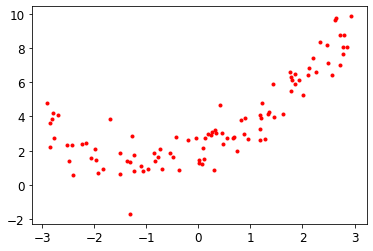

In [6]:
plt.plot(X,y,'r.')

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2 ,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.76886782])

In [8]:
X_poly[0]

array([1.76886782, 3.12889337])

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly ,y)
lin_reg.intercept_ ,lin_reg.coef_

(array([1.99958228]), array([[1.04630034, 0.5015459 ]]))

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model ,X ,y):
    X_train ,X_val ,y_train ,y_val = train_test_split(X ,y ,test_size=.2)
    train_errors ,val_errors = [] ,[]
    for m in range(1 ,len(X_train)):
        model.fit(X_train[:m] ,y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m] ,y_train_predict))
        val_errors.append(mean_squared_error(y_val ,y_val_predict))
    plt.plot(np.sqrt(train_errors) ,"r-+" ,linewidth=2 ,label="train")
    plt.plot(np.sqrt(val_errors) ,"b-" ,linewidth=3 ,label="vali")
    plt.legend()
    plt.axis([5 ,80 ,0 ,4.5])

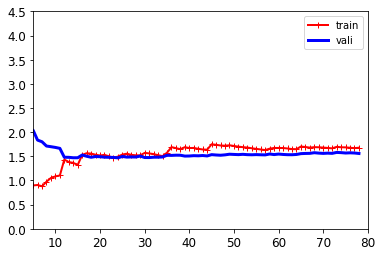

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg ,X ,y)

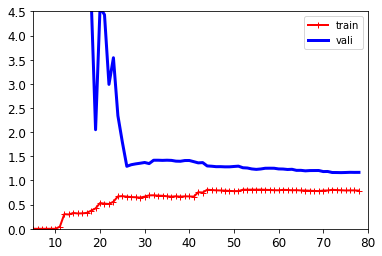

In [14]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features" ,PolynomialFeatures(degree=10 ,include_bias=False))
    ,("lin_reg" ,LinearRegression())
])

plot_learning_curves(polynomial_regression ,X ,y)

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1 ,solver="cholesky")
ridge_reg.fit(X ,y)
ridge_reg.predict([[1.5]])

array([[5.1209944]])

In [42]:
y[:10]

array([[5.69515418],
       [3.72143765],
       [7.24072442],
       [3.946073  ],
       [4.04800408],
       [1.19914882],
       [2.76297867],
       [3.47024752],
       [0.87071706],
       [2.49606982]])

In [43]:
y.ravel()[:10]

array([5.69515418, 3.72143765, 7.24072442, 3.946073  , 4.04800408,
       1.19914882, 2.76297867, 3.47024752, 0.87071706, 2.49606982])

In [18]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X ,y.ravel())
sgd_reg.predict([[1.5]])

array([5.06935559])

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.07363163])

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=.1 ,l1_ratio=.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.66432024])

NameError: name 'save_fig' is not defined

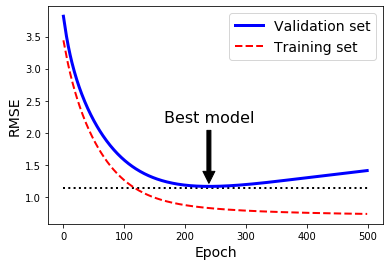

In [69]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [64]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#prepare the data
poly_scaler = Pipeline([
    ("poly_features" ,PolynomialFeatures(degree=90 ,include_bias=False))
    ,("std_scalar" ,StandardScaler()),
])

#X_train ,X_val ,y_train ,y_val = train_test_split(X ,y ,test_size=.2)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel()
                                                  , test_size=0.5, random_state=10)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1 ,tol=-np.infty ,warm_start=True
                      ,penalty=None ,learning_rate="constant" ,eta0=.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled ,y_train) #continue where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val ,y_val_predict)
    print (epoch ,X_train_poly_scaled.shape ,y_val_predict.shape)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

0 (25, 90) (25,)
1 (25, 90) (25,)
2 (25, 90) (25,)
3 (25, 90) (25,)
4 (25, 90) (25,)
5 (25, 90) (25,)
6 (25, 90) (25,)
7 (25, 90) (25,)
8 (25, 90) (25,)
9 (25, 90) (25,)
10 (25, 90) (25,)
11 (25, 90) (25,)
12 (25, 90) (25,)
13 (25, 90) (25,)
14 (25, 90) (25,)
15 (25, 90) (25,)
16 (25, 90) (25,)
17 (25, 90) (25,)
18 (25, 90) (25,)
19 (25, 90) (25,)
20 (25, 90) (25,)
21 (25, 90) (25,)
22 (25, 90) (25,)
23 (25, 90) (25,)
24 (25, 90) (25,)
25 (25, 90) (25,)
26 (25, 90) (25,)
27 (25, 90) (25,)
28 (25, 90) (25,)
29 (25, 90) (25,)
30 (25, 90) (25,)
31 (25, 90) (25,)
32 (25, 90) (25,)
33 (25, 90) (25,)
34 (25, 90) (25,)
35 (25, 90) (25,)
36 (25, 90) (25,)
37 (25, 90) (25,)
38 (25, 90) (25,)
39 (25, 90) (25,)
40 (25, 90) (25,)
41 (25, 90) (25,)
42 (25, 90) (25,)
43 (25, 90) (25,)
44 (25, 90) (25,)
45 (25, 90) (25,)
46 (25, 90) (25,)
47 (25, 90) (25,)
48 (25, 90) (25,)
49 (25, 90) (25,)
50 (25, 90) (25,)
51 (25, 90) (25,)
52 (25, 90) (25,)
53 (25, 90) (25,)
54 (25, 90) (25,)
55 (25, 90) (25,)
56

538 (25, 90) (25,)
539 (25, 90) (25,)
540 (25, 90) (25,)
541 (25, 90) (25,)
542 (25, 90) (25,)
543 (25, 90) (25,)
544 (25, 90) (25,)
545 (25, 90) (25,)
546 (25, 90) (25,)
547 (25, 90) (25,)
548 (25, 90) (25,)
549 (25, 90) (25,)
550 (25, 90) (25,)
551 (25, 90) (25,)
552 (25, 90) (25,)
553 (25, 90) (25,)
554 (25, 90) (25,)
555 (25, 90) (25,)
556 (25, 90) (25,)
557 (25, 90) (25,)
558 (25, 90) (25,)
559 (25, 90) (25,)
560 (25, 90) (25,)
561 (25, 90) (25,)
562 (25, 90) (25,)
563 (25, 90) (25,)
564 (25, 90) (25,)
565 (25, 90) (25,)
566 (25, 90) (25,)
567 (25, 90) (25,)
568 (25, 90) (25,)
569 (25, 90) (25,)
570 (25, 90) (25,)
571 (25, 90) (25,)
572 (25, 90) (25,)
573 (25, 90) (25,)
574 (25, 90) (25,)
575 (25, 90) (25,)
576 (25, 90) (25,)
577 (25, 90) (25,)
578 (25, 90) (25,)
579 (25, 90) (25,)
580 (25, 90) (25,)
581 (25, 90) (25,)
582 (25, 90) (25,)
583 (25, 90) (25,)
584 (25, 90) (25,)
585 (25, 90) (25,)
586 (25, 90) (25,)
587 (25, 90) (25,)
588 (25, 90) (25,)
589 (25, 90) (25,)
590 (25, 90)

In [65]:
minimum_val_error

1.1479749582346266

In [66]:
best_epoch

421

In [67]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [35]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [73]:
X = iris["data"][: ,3:] #petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris-Virginica, else 0

In [74]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

/Volumes/lin/MachineLearning/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


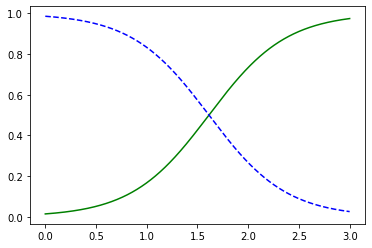

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new ,y_proba[:,1] ,"g-" ,label="Iris-Virginica")
plt.plot(X_new ,y_proba[:,0] ,"b--" ,label="Not Iris-Virginica")
# add more Matplotlib code to make image look prettier

In [39]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [40]:
log_reg.predict_proba([[1.7],[1.5]])

array([[0.44316529, 0.55683471],
       [0.57328164, 0.42671836]])

In [41]:
X = iris["data"][: ,(2,3)] #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial" ,solver="lbfgs" ,C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
softmax_reg.predict([[5,2]])

array([2])

In [43]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [61]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [63]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

np.random.seed(2042)

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [64]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [65]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [70]:
X_train.shape[1]

3

In [72]:
np.random.randn(3, 3)

array([[ 0.11330361, -0.23452355, -0.20774285],
       [ 0.43433246, -0.66647126, -0.71757054],
       [ 1.0188498 ,  0.41245226, -0.75018439]])